# **How Can a Wellness Technology Company Play It Smart?**

Urška Sršen and Sando Mur founded **Bellabeat**, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

**Table of contents**

1. **Ask Phase**
    * 1.1. Questions To Answer
    
    * 1.2. The Business Task
    
    * 1.3. Key Stakeholders

    * 1.4. Deliverables

2. **Prepare Phase**
    
    * 2.1. Data Source
    
    * 2.2. Data Bias and Data Credibility
    
    * 2.3. Load and Identify The Data
    
    * 2.4. Sort and Filter The Data
    
3. **Process Phase**

    * 3.1. Data Cleaning

        * 3.1.1 Removing Unnecessary Columns 
    
        * 3.1.2 Handling Duplicates
    
        * 3.1.3 Handling Missing Data
    
        * 3.1.4 Handling Outliers

    * 3.2 Adding Necessary Columns
    
    * 3.3 Transform Data Types

4. **Analyze Phase**

    * 4.1. Univariate Exploration Data Analysis
    
      * 4.1.1. Univariate Exploration For Categorical Columns

      * 4.1.2. Univariate Exploration For Numerical Columns    
    
    * 4.2. Bivariate Exploration Data Analysis
    
    * 4.3. Multivariate Exploration Data Analysis


5. **Share Phase**
    
    * 5.1. Questions Answered (Explanatory Data Analysis)
    

6. **Act Phase**
    
    * 6.1.  Final Conclusions
    
    * 6.2.  Recommendations Presentation

## **1. Ask Phase:**

* ### **1.1. Questions To Answer**
    
In this phase, I want to answer the follwoing questions:
    
* What are some trends in smart device usage?

* How could these trends apply to Bellabeat customers?
        
* How could these trends help influence Bellabeat marketing strategy?
<br>

* ### **1.2. The Business Task**

Urška Sršen believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I've been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. In coclusion, the main business task here is:

**How consumers are using their smart devices?**
<br>

* ### **1.3. Key Stakeholders**

The key stakeholders of this project are:
    
* **Urška Sršen:** Bellabeat’s cofounder and Chief Creative Officer.
* **Sando Mur:** Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.
* **Bellabeat marketing analytics team:** A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.
<br>

* ### **1.4. Deliverables**

I'll be producing a report with the following deliverables:

* A clear summary of the business task.
* A description of all data sources used.
* Documentation of any cleaning or manipulation of data.
* A summary of my analysis.
* Supporting visualizations and key findings.
* Top high-level content recommendations based on my analysis.

## **2. Prepare Phase:**

* ### **2.1. Data Source**

In this phase, I'll be using a public dataset that explores smart device users’ daily habits: 
    
* [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic))
<br>
<br>

* ### **2.2. Data Bias and Data Credibility**

These Kaggle datasets contain personal fitness tracker data from 33 fitbit users. These users consented to the submission of their personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.    

* Now let's check if these datasets ROCCC?
    
    * Reliabilty of the data (R): this data set might have some limitations because of the sample size, because it doesn't reflect the overall population, and I might consider adding additional data to help address those limitations later.

    * Originality of the data (O): these datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, making them third party data, that comes from outside sources, such as websites or programs that pull the data from the various platforms where it was originally generated, we can check the [source here](https://zenodo.org/record/53894#.YyQ2MS8RppS), so I may need to be extra careful in understanding your data.

    * Comprehensibility of the data (C): these data sets include lots of information about those users that would be very beneficial to answer the questions that were asked, such as minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B).  Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

    * If the data is Current (C): these datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between March 13, 2016 and May 13, 2016. Even though the data have been collected nearly six years ago, it's still relevant and can generate fruitful insights to help accomplish the business task.

    * If the data is Cited (C): these datasets come from the [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain).

<br>

* ### **2.3. Load and Identify The Data**

First of all we import all the required libraries for our analysis.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import os
import plotly.io as pio
pio.renderers.default = "svg"

import warnings; warnings.filterwarnings('ignore')

Now I'll load the data and check each of them

In [2]:
daily_activity = pd.read_csv('dailyActivity_merged.csv')
daily_calories = pd.read_csv('dailyCalories_merged.csv')
daily_intensities = pd.read_csv('dailyIntensities_merged.csv')
daily_steps = pd.read_csv('dailySteps_merged.csv')
daily_sleep = pd.read_csv('sleepDay_merged.csv')
weight_log_info = pd.read_csv('weightLogInfo_merged.csv')

I'll check out the contents and shapes of the 'daily' recorded datasets:

In [3]:
print(daily_activity.shape)
daily_activity.head()

(940, 15)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
print(daily_calories.shape)
daily_calories.head()

(940, 3)


,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [5]:
print(daily_intensities.shape)
daily_intensities.head()

(940, 10)


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [6]:
print(daily_steps.shape)
daily_steps.head()

(940, 3)


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


>From the columns' data and the number of rows I see above, the data in the datasest **'daily_calories'**, **'daily_intensities'**, and **'daily_steps'** are all already included in the dataset **'daily_activity'**, so I'll be using only this dataset for my analysis.

In [7]:
print(daily_sleep.shape)
daily_sleep.head()

(413, 5)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


>Even though the dataset **'daily_sleep'** doesn't have the same number of rows as the rest of the daily dataset (the sleep tracker was not activated every day like the activity trackers), I can still merge it with the **'daily_activity'** dataset to get useful insights. But I should convert the datetime column in the **'daily_sleep'** and the date column in the **'daily_activity'** to the same format to be able to merge the two datasets.

In [8]:
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay']).dt.date
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate']).dt.date

In [9]:
daily_activity = pd.merge(left=daily_activity, right=daily_sleep, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])
print(daily_activity.shape)
daily_activity

(943, 19)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2016-04-16,2.0,340.0,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,NaN,NaN,NaN,NaN
939,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,NaN,NaN,NaN,NaN
940,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,NaN,NaN,NaN,NaN
941,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,NaN,NaN,NaN,NaN


>The number of rows has increased by 3, this indicates that there might be duplicated rows, let's get rid of those.

In [10]:
daily_activity.drop_duplicates(inplace=True)
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2016-04-16,2.0,340.0,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,NaN,NaN,NaN,NaN
939,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,NaN,NaN,NaN,NaN
940,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,NaN,NaN,NaN,NaN
941,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,NaN,NaN,NaN,NaN


In [11]:
daily_activity[daily_activity['SleepDay'].notna()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2.0,384.0,407.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2.0,340.0,367.0
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,2016-04-17,1.0,700.0,712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,2016-04-30,1.0,343.0,360.0
902,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,2016-05-01,1.0,503.0,527.0
903,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,2016-05-02,1.0,415.0,423.0
904,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,2016-05-03,1.0,516.0,545.0


>As I can see above in the number of non null sleep actvity rows (410 rows out of 940), I can use the merged dataset for useful insights.

Now I'll review the weight dataset:

In [12]:
print(weight_log_info.shape)
weight_log_info

(67, 8)


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


>I'll merge this dataset with the **'daily_activity'** dataset and see if this process can be helpful or not.

In [13]:
weight_log_info['Date'] = pd.to_datetime(weight_log_info['Date']).dt.date
weight_log_info

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,2016-05-08,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,2016-05-09,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,2016-05-11,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [14]:
daily_activity = pd.merge(left=daily_activity, right=weight_log_info, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'Date'])
print(daily_activity.shape)
daily_activity

(940, 26)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,...,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,...,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,...,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,...,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,NaN,NaN,NaN,2016-05-08,85.400002,188.274775,NaN,25.559999,False,1.462693e+12
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,NaN,NaN,NaN,2016-05-09,85.500000,188.495234,NaN,25.610001,False,1.462776e+12
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,NaN,NaN,NaN,2016-05-11,85.400002,188.274775,NaN,25.559999,False,1.462950e+12


In [15]:
daily_activity[daily_activity['WeightKg'].notna()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
20,1503960366,2016-05-02,14727,9.710000,9.710000,0.0,3.21,0.57,5.92,0.00,...,1.0,277.0,309.0,2016-05-02,52.599998,115.963147,22.0,22.650000,True,1.462234e+12
21,1503960366,2016-05-03,15103,9.660000,9.660000,0.0,3.73,1.05,4.88,0.00,...,1.0,273.0,296.0,2016-05-03,52.599998,115.963147,NaN,22.650000,True,1.462320e+12
124,1927972279,2016-04-13,356,0.250000,0.250000,0.0,0.00,0.00,0.25,0.00,...,1.0,398.0,422.0,2016-04-13,133.500000,294.317120,NaN,47.540001,False,1.460510e+12
274,2873212765,2016-04-21,8859,5.980000,5.980000,0.0,0.13,0.37,5.47,0.01,...,NaN,NaN,NaN,2016-04-21,56.700001,125.002104,NaN,21.450001,True,1.461283e+12
295,2873212765,2016-05-12,7566,5.110000,5.110000,0.0,0.00,0.00,5.11,0.00,...,NaN,NaN,NaN,2016-05-12,57.299999,126.324875,NaN,21.690001,True,1.463098e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,8877689391,2016-05-06,21727,19.340000,19.340000,0.0,12.79,0.29,6.16,0.00,...,NaN,NaN,NaN,2016-05-06,85.000000,187.392923,NaN,25.440001,False,1.462517e+12
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,NaN,NaN,NaN,2016-05-08,85.400002,188.274775,NaN,25.559999,False,1.462693e+12
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,NaN,NaN,NaN,2016-05-09,85.500000,188.495234,NaN,25.610001,False,1.462776e+12
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,NaN,NaN,NaN,2016-05-11,85.400002,188.274775,NaN,25.559999,False,1.462950e+12


>As I can see above in the number of non null Weight rows (67 rows out of 940), I can still use the merged dataset for useful insights.

* ### **2.4. Sort and Filter The Data**

For my analysis, I'll use the **'daily_activity'** dataset.

To get a better understanding of the data we're dealing with, let's review this brief description of the columnn we have.       

* **Id**: this represent the ID number assigned to the eligible Fitbit users consented to the submission of their personal tracker data.
* **ActivityDate**: this represents the date in which the data was recorded.
* **TotalSteps**: number of total steps recorded.
* **TotalDistance**: total distance recorded in kilometers.
* **TrackerDistance**: total distance recorded in kilometers (mostly similar to **'TotalDistance'** and will be checked in details later).
* **LoggedActivitiesDistance**: total distance recorded in kilometers when distance tracker is actively recording.
* **VeryActiveDistance**: recorded distance when user was very active.
* **ModeratelyActiveDistance**: recorded distance when user was moderately active.
* **LightActiveDistance**: recorded distance when user was lightly active.
* **SedentaryActiveDistance**: recorded distance when user was in sedentary state.
* **VeryActiveMinutes**: recorded minutes when user was very active.
* **FairlyActiveMinutes**: recorded minutes when user was moderately active.
* **LightlyActiveMinutes**: recorded minutes when user was lightly active.
* **SedentaryMinutes**: recorded minutes when user was in sedentary state.
* **Calories**: recorded calaries burnt per day.
* **SleepDay**: recorded sleep day.
* **TotalSleepRecords**: recorded times of sleep per day.
* **TotalMinutesAsleep**: recorded minutes when user is asleep.
* **TotalTimeInBed**: recorded minutes while user is in bed, asleep or not.

Let's check out the column names, number of rows and columns, an overview information of these columns to know the types of each one, brief statistical description of the numercial columns, and the number of unique values in each column.

* Columns names:

In [16]:
daily_activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Date',
       'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId'],
      dtype='object')

* Number of rows and columns:

In [17]:
print(f'This dataset has {daily_activity.shape[0]} rows, and {daily_activity.shape[1]} columns.')

This dataset has 940 rows, and 26 columns.


* Column data types:

In [18]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

* Brief statistical description of the numercial columns:

In [19]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,...,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,LogId
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,...,940.000000,940.000000,410.000000,410.000000,410.000000,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,...,991.210638,2303.609574,1.119512,419.173171,458.482927,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,...,301.267437,718.166862,0.346636,118.635918,127.455140,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,58.000000,61.000000,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,...,729.750000,1828.500000,1.000000,361.000000,403.750000,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,...,1057.500000,2134.000000,1.000000,432.500000,463.000000,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,...,1229.500000,2793.250000,1.000000,490.000000,526.000000,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,...,1440.000000,4900.000000,3.000000,796.000000,961.000000,133.500000,294.317120,25.00000,47.540001,1.463098e+12


* Number of unique values in each column:

In [20]:
daily_activity.nunique()

Id                           33
ActivityDate                 31
TotalSteps                  842
TotalDistance               615
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        335
SedentaryMinutes            549
Calories                    734
SleepDay                     31
TotalSleepRecords             3
TotalMinutesAsleep          256
TotalTimeInBed              242
Date                         31
WeightKg                     34
WeightPounds                 34
Fat                           2
BMI                          36
IsManualReport                2
LogId                        56
dtype: int64

>To get to know the unique data values better, I'll check out the column values that have a small number of unique values.

In [21]:
daily_activity['Id'].unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391])

>We evidently have 33 users in our dataset.

In [22]:
daily_activity['ActivityDate'].unique()

array([datetime.date(2016, 4, 12), datetime.date(2016, 4, 13),
       datetime.date(2016, 4, 14), datetime.date(2016, 4, 15),
       datetime.date(2016, 4, 16), datetime.date(2016, 4, 17),
       datetime.date(2016, 4, 18), datetime.date(2016, 4, 19),
       datetime.date(2016, 4, 20), datetime.date(2016, 4, 21),
       datetime.date(2016, 4, 22), datetime.date(2016, 4, 23),
       datetime.date(2016, 4, 24), datetime.date(2016, 4, 25),
       datetime.date(2016, 4, 26), datetime.date(2016, 4, 27),
       datetime.date(2016, 4, 28), datetime.date(2016, 4, 29),
       datetime.date(2016, 4, 30), datetime.date(2016, 5, 1),
       datetime.date(2016, 5, 2), datetime.date(2016, 5, 3),
       datetime.date(2016, 5, 4), datetime.date(2016, 5, 5),
       datetime.date(2016, 5, 6), datetime.date(2016, 5, 7),
       datetime.date(2016, 5, 8), datetime.date(2016, 5, 9),
       datetime.date(2016, 5, 10), datetime.date(2016, 5, 11),
       datetime.date(2016, 5, 12)], dtype=object)

>It seems that the activities were recorded **throughout 31 days, from April 12, 2016 till May 12, 2016.**

In [23]:
daily_activity['LoggedActivitiesDistance'].unique()

array([0.        , 1.95959604, 4.08169222, 2.78517509, 3.16782188,
       4.86978292, 4.85130692, 3.28541493, 4.9305501 , 4.94214201,
       4.92484093, 4.86179209, 4.88560486, 4.91114616, 2.83232594,
       4.91236782, 4.878232  , 2.25308108, 2.09214711])

>We have 19 unique values in the 'LoggedActivitiesDistance' column.

In [24]:
daily_activity['SedentaryActiveDistance'].unique()

array([0.  , 0.01, 0.02, 0.03, 0.05, 0.07, 0.04, 0.11, 0.1 ])

>There seems to be a lack of variety in the values of the 'SedentaryActiveDistance', as we have only 9 unique values. 

In [25]:
daily_activity['SleepDay'].unique()

array([datetime.date(2016, 4, 12), datetime.date(2016, 4, 13), nan,
       datetime.date(2016, 4, 15), datetime.date(2016, 4, 16),
       datetime.date(2016, 4, 17), datetime.date(2016, 4, 19),
       datetime.date(2016, 4, 20), datetime.date(2016, 4, 21),
       datetime.date(2016, 4, 23), datetime.date(2016, 4, 24),
       datetime.date(2016, 4, 25), datetime.date(2016, 4, 26),
       datetime.date(2016, 4, 28), datetime.date(2016, 4, 29),
       datetime.date(2016, 4, 30), datetime.date(2016, 5, 1),
       datetime.date(2016, 5, 2), datetime.date(2016, 5, 3),
       datetime.date(2016, 5, 5), datetime.date(2016, 5, 6),
       datetime.date(2016, 5, 7), datetime.date(2016, 5, 8),
       datetime.date(2016, 5, 9), datetime.date(2016, 5, 10),
       datetime.date(2016, 5, 11), datetime.date(2016, 4, 14),
       datetime.date(2016, 4, 22), datetime.date(2016, 4, 27),
       datetime.date(2016, 5, 4), datetime.date(2016, 5, 12),
       datetime.date(2016, 4, 18)], dtype=object)

>It seems that the activities were recorded **throughout 31 days, from April 12, 2016 till May 12, 2016.**

In [26]:
daily_activity['TotalSleepRecords'].unique()

array([ 1.,  2., nan,  3.])

>We have 3 unique values, other than the null values in the 'TotalSleepRecords' column.

## **3. Process Phase:**

  * ### **3.1 Data Cleaning**

      * **3.1.1 Removing Unnecessary Columns**

In [27]:
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,1.0,700.0,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,...,1.0,304.0,320.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,...,1.0,360.0,377.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,...,1.0,325.0,364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First I need to know how many rows of the **"TotalDistance"** and **"TrackerDistance"** columns **equal zero** to see if they'll be of any benifit for us in the first place.

In [28]:
daily_activity[daily_activity['TrackerDistance'] == 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
30,1503960366,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,1844505072,2016-04-24,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,1844505072,2016-04-25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,1844505072,2016-04-26,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,1844505072,2016-04-27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,2016-05-06,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,8792009665,2016-05-07,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,8792009665,2016-05-08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,8792009665,2016-05-09,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
daily_activity[daily_activity['TotalDistance'] == 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
30,1503960366,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,1844505072,2016-04-24,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,1844505072,2016-04-25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,1844505072,2016-04-26,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,1844505072,2016-04-27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,2016-05-06,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,8792009665,2016-05-07,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,8792009665,2016-05-08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,8792009665,2016-05-09,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I'll check out the differences in the rows between the **"TotalDistance"** and the **"TrackerDistance"** columns, then I'll calculate the percentage of these differences to decide if using only one of them is sufficient.

In [30]:
val=daily_activity[daily_activity['TotalDistance'] != daily_activity['TrackerDistance']].shape[0]
percent=val/(daily_activity.shape[0])*100
print(f'This number of rows where there are differences between "TotalDistance" & "TrackerDistance" values is {val} rows, and this represents {percent:.2f}% of the original dataset rows number.')

This number of rows where there are differences between "TotalDistance" & "TrackerDistance" values is 15 rows, and this represents 1.60% of the original dataset rows number.


>It seems that differences between the two columns are very minimal, so I'll drop the **"TrackerDistance"**.

I also want to see how many rows of the **"LoggedActivitiesDistance"** columns equal zero.

In [31]:
daily_activity[daily_activity['LoggedActivitiesDistance'] == 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,...,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,...,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,...,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,...,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,NaN,NaN,NaN,2016-05-08,85.400002,188.274775,NaN,25.559999,False,1.462693e+12
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,NaN,NaN,NaN,2016-05-09,85.500000,188.495234,NaN,25.610001,False,1.462776e+12
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,NaN,NaN,NaN,2016-05-11,85.400002,188.274775,NaN,25.559999,False,1.462950e+12


>It looks like most rows of the "LoggedActivitiesDistance" column have the value of zero. Let's check out the percentage of these rows from the number of rows of the whole dataset.

In [32]:
val=daily_activity[daily_activity['LoggedActivitiesDistance'] == 0].shape[0]
percent=val/(daily_activity.shape[0])*100
print(f'This number of rows where the column "LoggedActivitiesDistance" equals zero is {val} rows, and this represents {percent:.2f}% of the original dataset rows number. So I will drop this column too.')

This number of rows where the column "LoggedActivitiesDistance" equals zero is 908 rows, and this represents 96.60% of the original dataset rows number. So I will drop this column too.


* I'll be removing the following columns from the dataset:

    * **'TrackerDistance'** because it has the same values as **'TotalDistance'** in 98.4% instances, so I'll only use **'TotalDistance'** for my analysis.

    * **'LoggedActivitiesDistance'** column because in 96.6% of the rows it has the value of 0 and it won't be beneficial.

    * **'SleepDay'** and **'Date'** because the column **'ActivityDate'** already has all the registered dates.

    * **'TotalSleepRecords', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport'**, and **'LogId'** as they're somewhat redundant and I'll not need them for my analysis.

In [33]:
daily_activity.drop(columns=['TrackerDistance', 'LoggedActivitiesDistance', 'SleepDay', 'Date', 'TotalSleepRecords','WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId'], inplace=True)
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed,WeightKg
0,1503960366,2016-04-12,13162,8.500000,1.88,0.55,6.06,0.00,25,13,328,728,1985,327.0,346.0,NaN
1,1503960366,2016-04-13,10735,6.970000,1.57,0.69,4.71,0.00,21,19,217,776,1797,384.0,407.0,NaN
2,1503960366,2016-04-14,10460,6.740000,2.44,0.40,3.91,0.00,30,11,181,1218,1776,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.280000,2.14,1.26,2.83,0.00,29,34,209,726,1745,412.0,442.0,NaN
4,1503960366,2016-04-16,12669,8.160000,2.71,0.41,5.04,0.00,36,10,221,773,1863,340.0,367.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,1.08,0.20,6.80,0.00,17,4,245,1174,2847,NaN,NaN,85.400002
936,8877689391,2016-05-09,20226,18.250000,11.10,0.80,6.24,0.05,73,19,217,1131,3710,NaN,NaN,85.500000
937,8877689391,2016-05-10,10733,8.150000,1.35,0.46,6.28,0.00,18,11,224,1187,2832,NaN,NaN,NaN
938,8877689391,2016-05-11,21420,19.559999,13.22,0.41,5.89,0.00,88,12,213,1127,3832,NaN,NaN,85.400002


* **3.1.2 Handling Duplicates**

Let's start by checking out the duplicated rows in the dataset:

In [34]:
daily_activity.duplicated().sum()

0


> It seems that there are no duplicated rows in our dataset.




* **3.1.3 Handling Missing Data**

Now let's see the number of missing/null values in our dataset:

In [35]:
daily_activity.isna().sum()

Id                            0
ActivityDate                  0
TotalSteps                    0
TotalDistance                 0
VeryActiveDistance            0
ModeratelyActiveDistance      0
LightActiveDistance           0
SedentaryActiveDistance       0
VeryActiveMinutes             0
FairlyActiveMinutes           0
LightlyActiveMinutes          0
SedentaryMinutes              0
Calories                      0
TotalMinutesAsleep          530
TotalTimeInBed              530
WeightKg                    873
dtype: int64

>I can notice that all sleep and weight related columns have null values (530 out of 940 rows for sleep related values, 873 out of 940 rows for weight related values), I'll still use the non null values in my analysis as they'll still be beneficial, and I'll keep the null values as is because replacing them with any zero will skew the my analysis.

* **3.1.4 Handling Outliers**

Now I'll check the datset to detect the outliers.

Outliers can be problematic because they can affect the results of an analysis. However, they can also be informative about the data I'm studying, because they can reveal abnormal cases or individuals that have rare traits.

I'll create two fucntions to make the plotting process of box and scatter plots in my exploration easier.

In [36]:
def view_box(daily_activity, col, title, x, x_new):
  g = px.box(daily_activity, x=col, width=1000, title=title, labels={x:x_new}, 
                   color_discrete_sequence=px.colors.qualitative.Set1).update_xaxes(categoryorder='total descending')
  g.show()  

def view_scatter(daily_activity, colx, coly, title, x, x_new):
  g = px.scatter(daily_activity, x=colx, y=coly, width=1000, title=title, labels={x:x_new}, 
                   color_discrete_sequence=px.colors.qualitative.Set1, trendline='ols')
  g.show()  

* **Total Steps:**

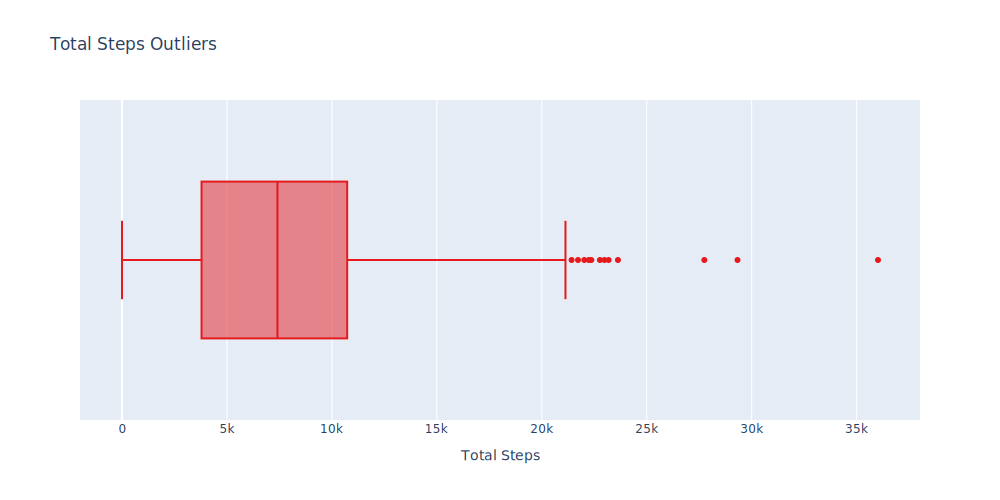

In [37]:
view_box(daily_activity, 'TotalSteps', 'Total Steps Outliers', 'TotalSteps', 'Total Steps')

I'll check if these outliers affect the results of my analysis or the assumptions I have by comparing them with another column values. Like the 'Calories' values.

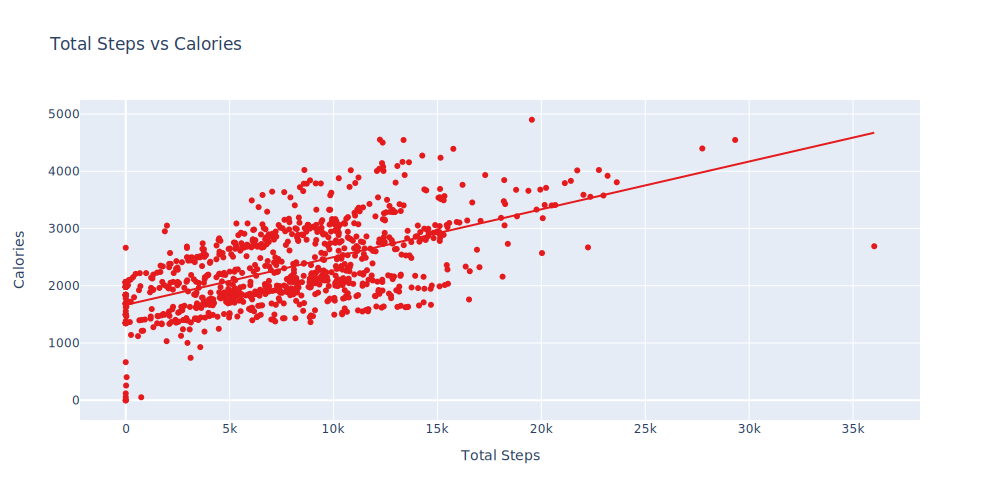

In [38]:
view_scatter(daily_activity, 'TotalSteps', 'Calories', 'Total Steps vs Calories','TotalSteps', 'Total Steps')

>In this scenario, the outliers don’t actually violate any of the assumptions of the linear regression model, so I could keep them in the dataset.
So I'll skip the outlier detection phase as the outliers in this dataset can reveal abnormal cases or individuals that have rare traits.

  * ### **3.2 Adding Necessary Columns**

A column with day names would be informative for me to explore the distribution of different values across days of the week.

I'll extract the weekdays from the **'ActvityDate'** column, and add them into a new column and call it **'ActivityDay'**.

In [39]:
daily_activity['ActivityDay'] = pd.to_datetime(daily_activity['ActivityDate']).dt.strftime('%A')
daily_activity['ActivityDay']

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
935       Sunday
936       Monday
937      Tuesday
938    Wednesday
939     Thursday
Name: ActivityDay, Length: 940, dtype: object

I will now categorize the steps values into 4 categories for better respresentation. I'll create a new column and name it **'StepsLevel'** and assign a category for each step value.

In [40]:
StepsLevel= []
for row in daily_activity['TotalSteps']:
  if row < 5000: StepsLevel.append('4999 or less')
  elif (row >= 5000) & (row < 10000): StepsLevel.append('5000 to 9999')
  elif (row >= 10000) & (row < 15000): StepsLevel.append('10000 to 14999')
  elif row >= 15000: StepsLevel.append('15000 or more')
  else: StepsLevel.append('unknown')
daily_activity['StepsLevel'] = StepsLevel

I will now categorize the total distance values into 4 categories for better respresentation. I'll create a new column and name it **'DistanceLevel'** and assign a category for each distance value.

In [41]:
DistanceLevel= []
for row in daily_activity['TotalDistance']:
  if row < 5: DistanceLevel.append('4.9 km or less')
  elif (row >= 5) & (row < 10): DistanceLevel.append('5 km to 9.9 km')
  elif (row >= 10) & (row < 15): DistanceLevel.append('10 km to 14.9 km')
  elif row >= 15: DistanceLevel.append('15 km or more')
  else: DistanceLevel.append('unknown')
daily_activity['DistanceLevel'] = DistanceLevel


I'll also create a new column for total activity minutes so it can help more in my distribution analysis. I'll call it **'TotalActivityMinutes'**.

In [42]:
daily_activity['TotalActivityMinutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes'] + daily_activity['SedentaryMinutes']

I'll create new columns for average user activity speeds for different intensities, execluding the sedentary distance values. I'll name these columns **'VeryActiveSpeed(m/s)', 'ModeratelyActiveSpeed(m/s)', and 'LightlyActiveSpeed(m/s)'**

In [43]:
daily_activity['VeryActiveSpeed(m/s)']= (daily_activity['VeryActiveDistance']*(1000)) / (daily_activity['VeryActiveMinutes']*(60))
daily_activity['VeryActiveSpeed(m/s)'] = daily_activity['VeryActiveSpeed(m/s)'].round(2)

daily_activity['ModeratelyActiveSpeed(m/s)']= (daily_activity['ModeratelyActiveDistance']*(1000)) / (daily_activity['FairlyActiveMinutes']*(60))
daily_activity['ModeratelyActiveSpeed(m/s)'] = daily_activity['ModeratelyActiveSpeed(m/s)'].round(2)

daily_activity['LightlyActiveSpeed(m/s)']= (daily_activity['LightActiveDistance']*(1000)) / (daily_activity['LightlyActiveMinutes']*(60))
daily_activity['LightlyActiveSpeed(m/s)'] = daily_activity['LightlyActiveSpeed(m/s)'].round(2)


I will categorize the calories values into 5 categories for better respresentation, so I'll creat a new column that has an assigned category for each value and name it **'CaloriesLevel'**

In [44]:
CaloriesLevel= []
for row in daily_activity['Calories']:
  if row < 1000: CaloriesLevel.append('999 calories or less')
  elif (row >= 1000) & (row < 2000): CaloriesLevel.append('1000 calories to 1999 calories')
  elif (row >= 2000) & (row < 3000): CaloriesLevel.append('2000 calories to 2999 calories')
  elif (row >= 3000) & (row < 4000): CaloriesLevel.append('3000 calories to 3999 calories')
  elif row >= 4000: CaloriesLevel.append('4000 calories or more')
  else: CaloriesLevel.append('unknown')
daily_activity['CaloriesLevel'] = CaloriesLevel


I will categorize the sleep values into 4 categories for better respresentation of the values. I'll creat a new column that has an assigned category for each value, and name it **'SleepLevel'**.

In [45]:
SleepLevel= []
for row in daily_activity['TotalMinutesAsleep']:
  if row < 420: SleepLevel.append('7 hours or less')
  elif (row >= 420) & (row < 540): SleepLevel.append('7 hours to 9 hours')
  elif row >= 540: SleepLevel.append('9 hours or more')
  else: SleepLevel.append(row)
daily_activity['SleepLevel'] = SleepLevel

I will create a new column to measure the difference between the time in bed and the total minutes asleep to get insights into the sleeping pattern of the participants later, I'll call it **'BedNoSleep'**.

In [46]:
daily_activity['BedNoSleep']= daily_activity['TotalTimeInBed'] - daily_activity['TotalMinutesAsleep']

In [47]:
daily_activity = daily_activity[['Id', 'ActivityDate', 'ActivityDay','TotalSteps', 'StepsLevel', 'TotalDistance',
       'DistanceLevel','VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'TotalActivityMinutes', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'VeryActiveSpeed(m/s)', 'ModeratelyActiveSpeed(m/s)', 
       'LightlyActiveSpeed(m/s)', 'Calories', 'CaloriesLevel','TotalMinutesAsleep', 'SleepLevel', 'TotalTimeInBed',
       'BedNoSleep', 'WeightKg']]
daily_activity

,Id,ActivityDate,ActivityDay,TotalSteps,StepsLevel,TotalDistance,DistanceLevel,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,VeryActiveSpeed(m/s),ModeratelyActiveSpeed(m/s),LightlyActiveSpeed(m/s),Calories,CaloriesLevel,TotalMinutesAsleep,SleepLevel,TotalTimeInBed,BedNoSleep,WeightKg
0,1503960366,2016-04-12,Tuesday,13162,10000 to 14999,8.500000,5 km to 9.9 km,1.88,0.55,6.06,...,1.25,0.71,0.31,1985,1000 calories to 1999 calories,327.0,7 hours or less,346.0,19.0,NaN
1,1503960366,2016-04-13,Wednesday,10735,10000 to 14999,6.970000,5 km to 9.9 km,1.57,0.69,4.71,...,1.25,0.61,0.36,1797,1000 calories to 1999 calories,384.0,7 hours or less,407.0,23.0,NaN
2,1503960366,2016-04-14,Thursday,10460,10000 to 14999,6.740000,5 km to 9.9 km,2.44,0.40,3.91,...,1.36,0.61,0.36,1776,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,Friday,9762,5000 to 9999,6.280000,5 km to 9.9 km,2.14,1.26,2.83,...,1.23,0.62,0.23,1745,1000 calories to 1999 calories,412.0,7 hours or less,442.0,30.0,NaN
4,1503960366,2016-04-16,Saturday,12669,10000 to 14999,8.160000,5 km to 9.9 km,2.71,0.41,5.04,...,1.25,0.68,0.38,1863,1000 calories to 1999 calories,340.0,7 hours or less,367.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,10686,10000 to 14999,8.110000,5 km to 9.9 km,1.08,0.20,6.80,...,1.06,0.83,0.46,2847,2000 calories to 2999 calories,NaN,NaN,NaN,NaN,85.400002
936,8877689391,2016-05-09,Monday,20226,15000 or more,18.250000,15 km or more,11.10,0.80,6.24,...,2.53,0.70,0.48,3710,3000 calories to 3999 calories,NaN,NaN,NaN,NaN,85.500000
937,8877689391,2016-05-10,Tuesday,10733,10000 to 14999,8.150000,5 km to 9.9 km,1.35,0.46,6.28,...,1.25,0.70,0.47,2832,2000 calories to 2999 calories,NaN,NaN,NaN,NaN,NaN
938,8877689391,2016-05-11,Wednesday,21420,15000 or more,19.559999,15 km or more,13.22,0.41,5.89,...,2.50,0.57,0.46,3832,3000 calories to 3999 calories,NaN,NaN,NaN,NaN,85.400002


  * ### **3.3 Transform Data Types**

  I'll convert the 'Id' values into strings so that I can easily plot them against other values for each user.

In [48]:
daily_activity['Id'] = daily_activity['Id'].astype(str)
daily_activity['Id']

0      1503960366
1      1503960366
2      1503960366
3      1503960366
4      1503960366
          ...    
935    8877689391
936    8877689391
937    8877689391
938    8877689391
939    8877689391
Name: Id, Length: 940, dtype: object

## **4. Analyze Phase:**

### **4.1. Univariate Exploration Data Analysis**

First let's check out the data type of each column:

In [49]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          940 non-null    object 
 1   ActivityDate                940 non-null    object 
 2   ActivityDay                 940 non-null    object 
 3   TotalSteps                  940 non-null    int64  
 4   StepsLevel                  940 non-null    object 
 5   TotalDistance               940 non-null    float64
 6   DistanceLevel               940 non-null    object 
 7   VeryActiveDistance          940 non-null    float64
 8   ModeratelyActiveDistance    940 non-null    float64
 9   LightActiveDistance         940 non-null    float64
 10  SedentaryActiveDistance     940 non-null    float64
 11  TotalActivityMinutes        940 non-null    int64  
 12  VeryActiveMinutes           940 non-null    int64  
 13  FairlyActiveMinutes         940 non

  * **4.1.1. Univariate Exploration For Categorical Columns**

    In this part of the analysis, I will perform univariate exploration on the categorical columns of the dataset, typical univariate exploration involves displaying the distribution for the columns within the dataset, the categorical columns in this dataset are:

    * **ActivityDate:** this column is a series of the dates that the activities were registered on, I will not do a univariate exploration on it as it won't be of any benefit.
    * **ActivityDay:** this column is a series of the days that the activities were registered on, I will not do a univariate exploration on it as it won't be of any benefit.
    * **StepsLevel:** I will do a univariate analysis on this column.
    * **DistanceLevel:** I will do a univariate analysis on this column.
    * **CaloriesLevel:** I will do a univariate analysis on this column.
    * **SleepLevel:** I will do a univariate analysis on this column.

    First, I'll create 2 functions to easily generate boxplots, and calculate percentages of the column values I'll explore. I'll name them **'view_distribution'** and **'view_percentages'**.


In [50]:
def view_distribution(daily_activity, col, title, x, x_new):
  g = px.histogram(daily_activity, x=col, width=800, title=title, labels={x:x_new}, 
                   color_discrete_sequence=px.colors.qualitative.Set1).update_xaxes(categoryorder='total descending')
  g.show()

def view_percentages(daily_activity, col):
  total = daily_activity[col].count()
  for val in daily_activity[col].unique():
    cnt = daily_activity[col][daily_activity[col] == val].count()
    print(f'{val} records {cnt} times \nWith a percentage of {cnt/total*100:.2f}% \n \n')

* **Steps Level:**

I'll plot the Steps Levels into a histogram, then show their distribution percentages.

count              940
unique               4
top       5000 to 9999
freq               334
Name: StepsLevel, dtype: object


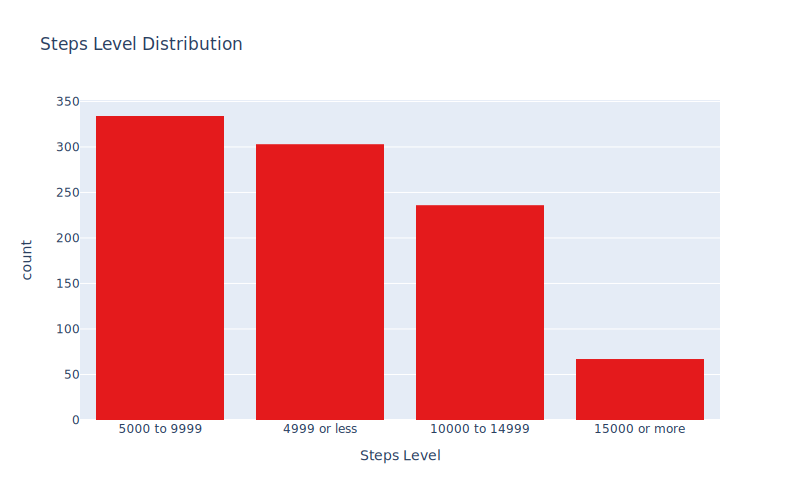

10000 to 14999 records 236 times 
With a percentage of 25.11% 
 

5000 to 9999 records 334 times 
With a percentage of 35.53% 
 

15000 or more records 67 times 
With a percentage of 7.13% 
 

4999 or less records 303 times 
With a percentage of 32.23% 
 

None 



In [51]:
print(daily_activity['StepsLevel'].describe())
view_distribution(daily_activity, 'StepsLevel', 'Steps Level Distribution','StepsLevel', 'Steps Level')
print(view_percentages(daily_activity, 'StepsLevel'), '\n')

>From the plot above, I can see that **most of the steps taken were less that 10K steps, more than half of them fall into the 5000 to 9999 steps category**.

* **Distance Level:**

I'll plot the Distance Levels into a histogram, then show their distribution percentages.

count                940
unique                 4
top       4.9 km or less
freq                 445
Name: DistanceLevel, dtype: object


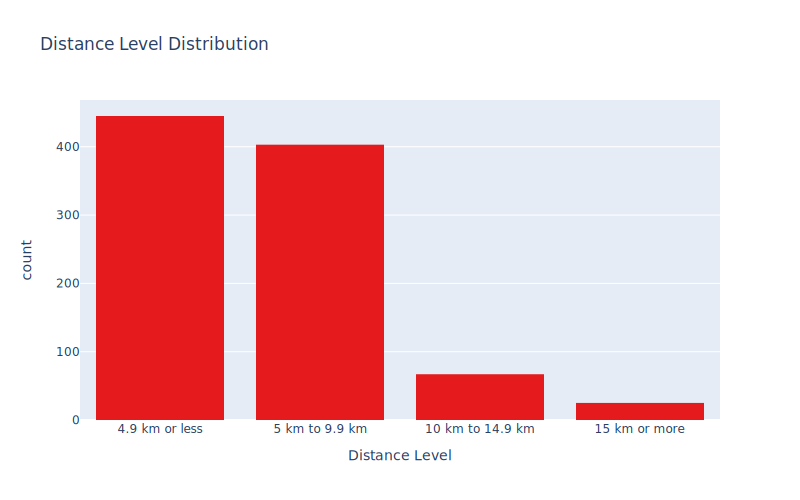

5 km to 9.9 km records 403 times 
With a percentage of 42.87% 
 

10 km to 14.9 km records 67 times 
With a percentage of 7.13% 
 

4.9 km or less records 445 times 
With a percentage of 47.34% 
 

15 km or more records 25 times 
With a percentage of 2.66% 
 

None 



In [52]:
print(daily_activity['DistanceLevel'].describe())
view_distribution(daily_activity, 'DistanceLevel', 'Distance Level Distribution','DistanceLevel', 'Distance Level')
print(view_percentages(daily_activity, 'DistanceLevel'), '\n')

>From the plot above, I can see that **most of the distances walked were less that 10 km, more than half of them fall into the less than 5km category**.

* **Calories Level:**

I'll plot the Calories Levels into a histogram, then show their distribution percentages.

count                                940
unique                                 5
top       2000 calories to 2999 calories
freq                                 418
Name: CaloriesLevel, dtype: object


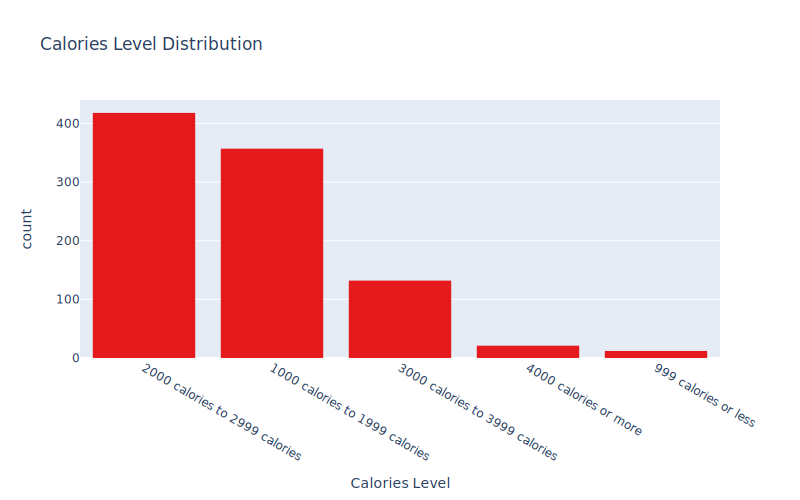

1000 calories to 1999 calories records 357 times 
With a percentage of 37.98% 
 

2000 calories to 2999 calories records 418 times 
With a percentage of 44.47% 
 

999 calories or less records 12 times 
With a percentage of 1.28% 
 

3000 calories to 3999 calories records 132 times 
With a percentage of 14.04% 
 

4000 calories or more records 21 times 
With a percentage of 2.23% 
 

None 



In [53]:
print(daily_activity['CaloriesLevel'].describe())
view_distribution(daily_activity, 'CaloriesLevel', 'Calories Level Distribution','CaloriesLevel', 'Calories Level')
print(view_percentages(daily_activity, 'CaloriesLevel'), '\n')

>From the plot above, I can see that **most of the burnt calories fall between 1000 calories and 3000 calories, more than half of them fall into the 2000 to 2999 category**.

* **Sleep Level:**

I'll plot the Sleep Levels into a histogram, then show their distribution percentages.

count                    410
unique                     3
top       7 hours to 9 hours
freq                     190
Name: SleepLevel, dtype: object


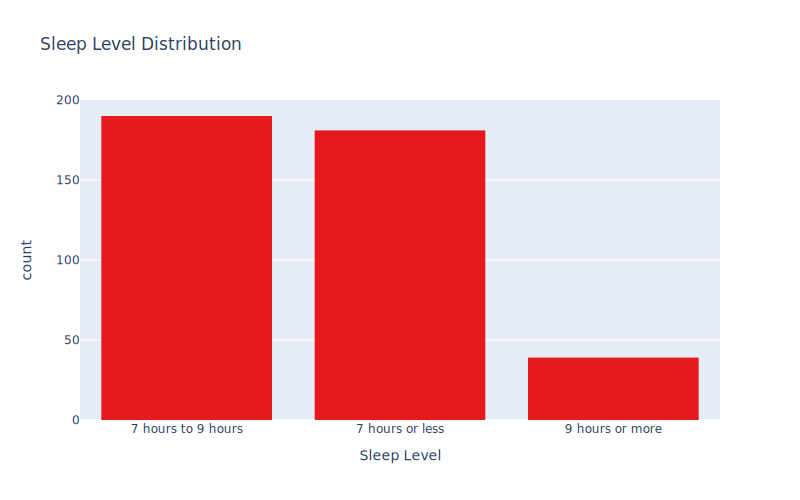

7 hours or less records 181 times 
With a percentage of 44.15% 
 

9 hours or more records 39 times 
With a percentage of 9.51% 
 

7 hours to 9 hours records 190 times 
With a percentage of 46.34% 
 

None 



In [54]:
print(daily_activity[daily_activity['SleepLevel'] != 'unknown']['SleepLevel'].describe())
view_distribution(daily_activity[daily_activity['SleepLevel'] != 'unknown'], 'SleepLevel', 'Sleep Level Distribution','SleepLevel', 'Sleep Level')
print(view_percentages(daily_activity[daily_activity['SleepLevel'].notna()], 'SleepLevel'), '\n')

>From the plot above, I can see that **sleeping hours were mostly less than 9 hours, more than half of them fall into the 7 to 9 hours asleep category**.

  * **4.1.2. Univariate Exploration For Numerical Columns**
    
    In this part of the analysis, I will perform univariate exploration on the numerical columns in our data.
    
    To have a better understanding of each column values, I'll include a statistical description of each column I explore, which consist of the count, mean, standard deviation, minimum, and maximum values.

* **Total Steps:**

count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: TotalSteps, dtype: float64


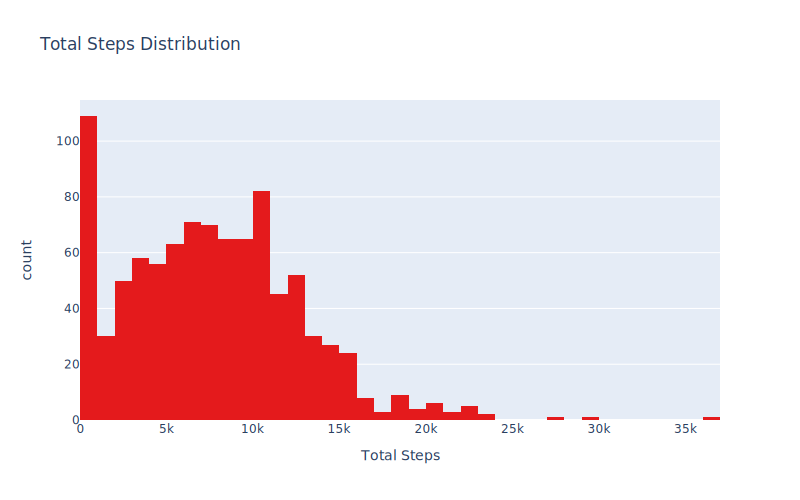

In [55]:
print(daily_activity['TotalSteps'].describe())
view_distribution(daily_activity, 'TotalSteps', 'Total Steps Distribution','TotalSteps', 'Total Steps')

>It seems like most of the Total Steps values lie between 0 and 999 steps, this makes me curious about how many of these values equal zero. I'll check out the values equal to zero to see if there are any abnormalities.

In [56]:
daily_activity[daily_activity['TotalSteps'] == 0]

,Id,ActivityDate,ActivityDay,TotalSteps,StepsLevel,TotalDistance,DistanceLevel,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,VeryActiveSpeed(m/s),ModeratelyActiveSpeed(m/s),LightlyActiveSpeed(m/s),Calories,CaloriesLevel,TotalMinutesAsleep,SleepLevel,TotalTimeInBed,BedNoSleep,WeightKg
30,1503960366,2016-05-12,Thursday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,0,999 calories or less,NaN,NaN,NaN,NaN,NaN
104,1844505072,2016-04-24,Sunday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1347,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
105,1844505072,2016-04-25,Monday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1347,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
106,1844505072,2016-04-26,Tuesday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1347,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
112,1844505072,2016-05-02,Monday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1348,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,2016-05-06,Friday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1688,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
905,8792009665,2016-05-07,Saturday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1688,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
906,8792009665,2016-05-08,Sunday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1688,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
907,8792009665,2016-05-09,Monday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1688,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN


>It seems fairly normal because I can see that Sedentary Minutes increase in the condition of zero Total Steps, I'll plot the values of SedentaryMinutes to make sure.

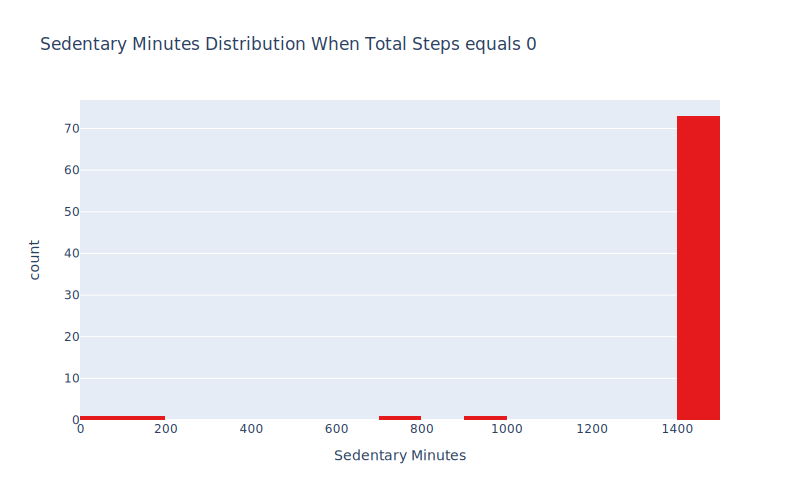

In [57]:
view_distribution(daily_activity[daily_activity['TotalSteps'] == 0], 'SedentaryMinutes', 'Sedentary Minutes Distribution When Total Steps equals 0','SedentaryMinutes', 'Sedentary Minutes')

>The values seem normal.

* **Total Distance:**

count    940.000000
mean       5.489702
std        3.924606
min        0.000000
25%        2.620000
50%        5.245000
75%        7.712500
max       28.030001
Name: TotalDistance, dtype: float64


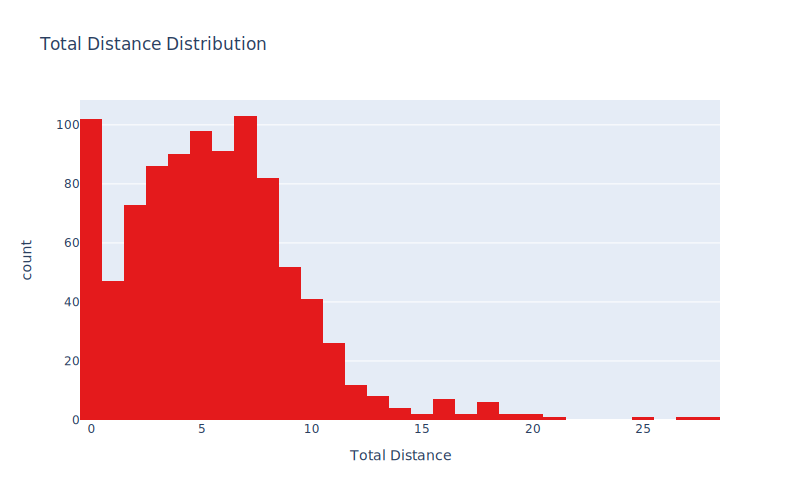

In [58]:
print(daily_activity['TotalDistance'].describe())
view_distribution(daily_activity, 'TotalDistance', 'Total Distance Distribution','TotalDistance', 'Total Distance')

>It seems like one of the most recurring values of the Total Distance lie between 0.0 km and 0.5 km, this makes me curious about how many of these values equal zero. I'll check out the values equal to zero to see if there are any abnormalities.

In [59]:
daily_activity[daily_activity['TotalDistance'] == 0]

,Id,ActivityDate,ActivityDay,TotalSteps,StepsLevel,TotalDistance,DistanceLevel,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,VeryActiveSpeed(m/s),ModeratelyActiveSpeed(m/s),LightlyActiveSpeed(m/s),Calories,CaloriesLevel,TotalMinutesAsleep,SleepLevel,TotalTimeInBed,BedNoSleep,WeightKg
30,1503960366,2016-05-12,Thursday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,0,999 calories or less,NaN,NaN,NaN,NaN,NaN
104,1844505072,2016-04-24,Sunday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1347,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
105,1844505072,2016-04-25,Monday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1347,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
106,1844505072,2016-04-26,Tuesday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1347,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
107,1844505072,2016-04-27,Wednesday,4,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,0.0,1348,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,2016-05-06,Friday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1688,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
905,8792009665,2016-05-07,Saturday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1688,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
906,8792009665,2016-05-08,Sunday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1688,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN
907,8792009665,2016-05-09,Monday,0,4999 or less,0.0,4.9 km or less,0.0,0.0,0.0,...,NaN,NaN,NaN,1688,1000 calories to 1999 calories,NaN,NaN,NaN,NaN,NaN


>It seems fairly normal because I can see that Sedentary Minutes increase in the condition of zero Total Distance, I'll plot the SedentaryMinutes values to make sure.

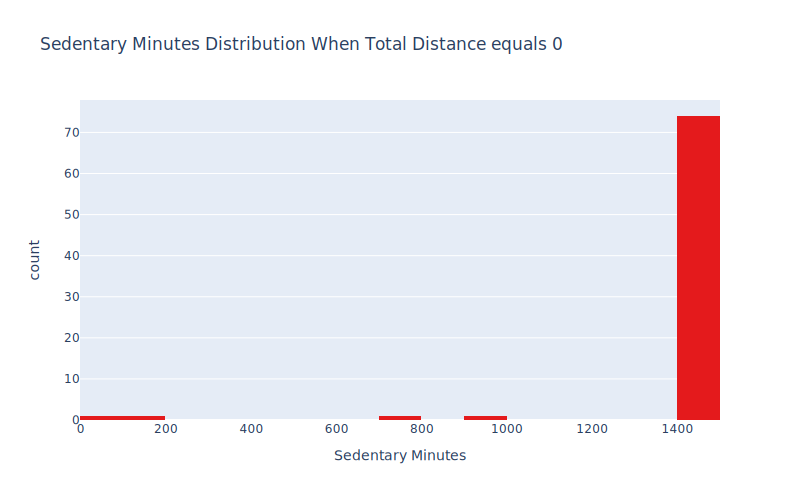

In [60]:
view_distribution(daily_activity[daily_activity['TotalDistance'] == 0], 'SedentaryMinutes', 'Sedentary Minutes Distribution When Total Distance equals 0','SedentaryMinutes', 'Sedentary Minutes')

>The values seem pretty normal here too.

* **Very Active Distance:**

count    940.000000
mean       1.502681
std        2.658941
min        0.000000
25%        0.000000
50%        0.210000
75%        2.052500
max       21.920000
Name: VeryActiveDistance, dtype: float64


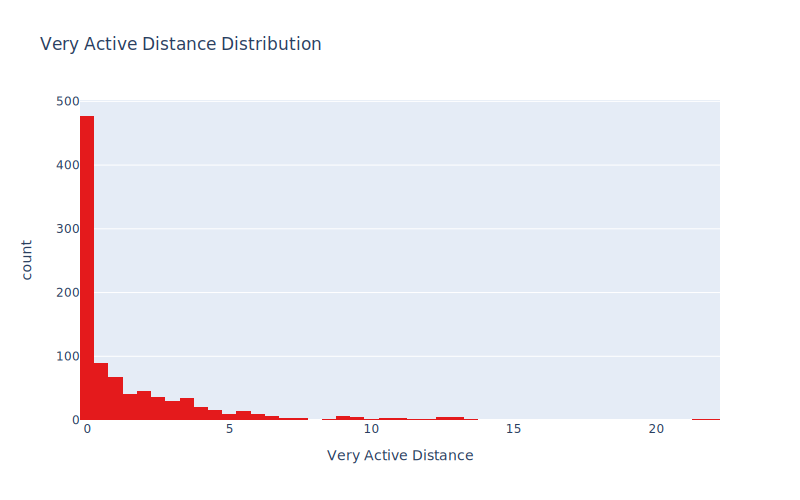

In [61]:
print(daily_activity['VeryActiveDistance'].describe())
view_distribution(daily_activity, 'VeryActiveDistance', 'Very Active Distance Distribution','VeryActiveDistance', 'Very Active Distance')

>The count of values from 0 km to 0.24 km seems pretty high, Let's check out all the intensities values when the very active distances equal zero.

In [62]:
daily_activity[['TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']][daily_activity['VeryActiveDistance']==0]

,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
30,0.00,0.0,0.00,0.00,0.00
31,5.31,0.0,0.00,5.31,0.00
32,4.55,0.0,0.00,4.55,0.00
33,5.92,0.0,0.00,5.91,0.01
34,0.98,0.0,0.00,0.97,0.00
...,...,...,...,...,...
907,0.00,0.0,0.00,0.00,0.00
908,0.00,0.0,0.00,0.00,0.00
914,8.87,0.0,0.07,8.79,0.00
920,7.43,0.0,0.00,7.40,0.01


>They equals zero when the distance was either registered in another intensity categories (because the summation of distances on other intensities equal the Total Distance figure), or when no distance was measured at all for any intensity as the Total Distance column also equals zero. So the values of zeros are normal, and I will not remove them from our dataset. The same goes for all other intensity columns too.

>I can also see from the histogram above that there are some very distant outlier values, as assured in the box plot below, I'll check these out.

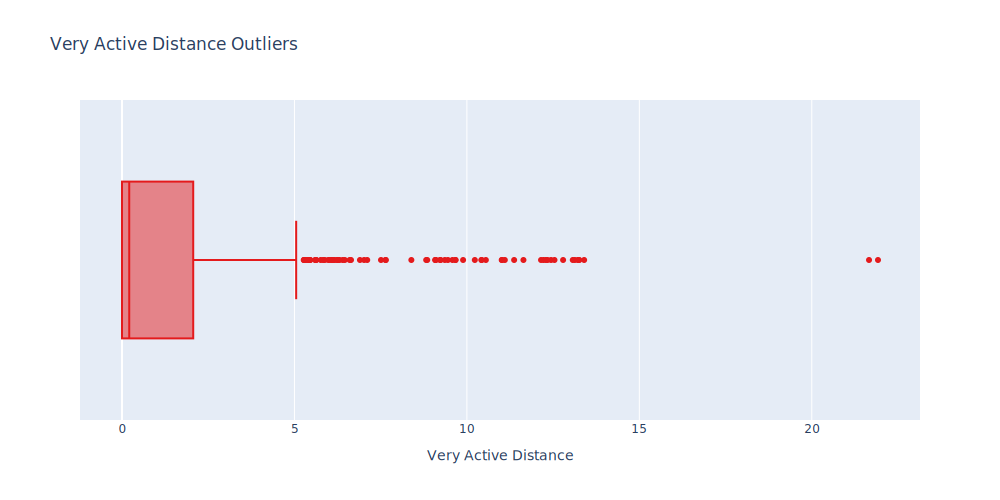

In [63]:
view_box(daily_activity, 'VeryActiveDistance', 'Very Active Distance Outliers', 'VeryActiveDistance', 'Very Active Distance')

>Overall, I can see that the distribution is [right skewed](https://en.wikipedia.org/wiki/Skewness), indicating that **most of the very active distances taken were short distances, with a median of 0.21 kms**, except for two outlier values where the users stayed active for very long distances compared to other users.

* **Moderately Active Distance:**

count    940.000000
mean       0.567543
std        0.883580
min        0.000000
25%        0.000000
50%        0.240000
75%        0.800000
max        6.480000
Name: ModeratelyActiveDistance, dtype: float64


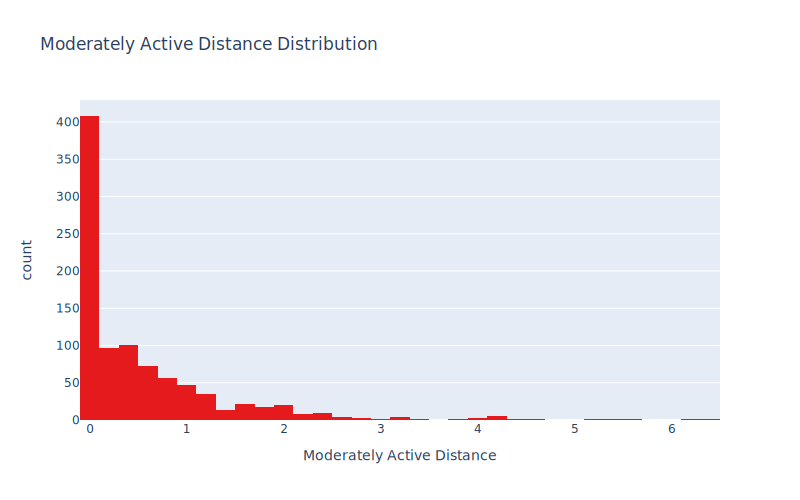

In [64]:
print(daily_activity['ModeratelyActiveDistance'].describe())
view_distribution(daily_activity, 'ModeratelyActiveDistance', 'Moderately Active Distance Distribution','ModeratelyActiveDistance', 'Moderately Active Distance')

>I can see that the distribution is right skewed here too, also indicating that **most of the moderately active distances taken were short distances**, except for some distant outlier values. But a little less right skewed than the very active distance distribution, meaning less moderately active short distances were taken compared to very active short distances, as seen in the [skewness](https://corporatefinanceinstitute.com/resources/data-science/skewness/) table below, where the bigger the number, the more skewed the plot to the right is *(Skewness = 3 * (Mean – Median) / Standard Deviation)*.

In [65]:
col_skw = daily_activity.skew(axis = 0, skipna = True)
col_skw.iloc[3:5]

VeryActiveDistance          2.996170
ModeratelyActiveDistance    2.771194
dtype: float64

Let's check out a brief statistics on a box plot of the Moderately Active Distance. 

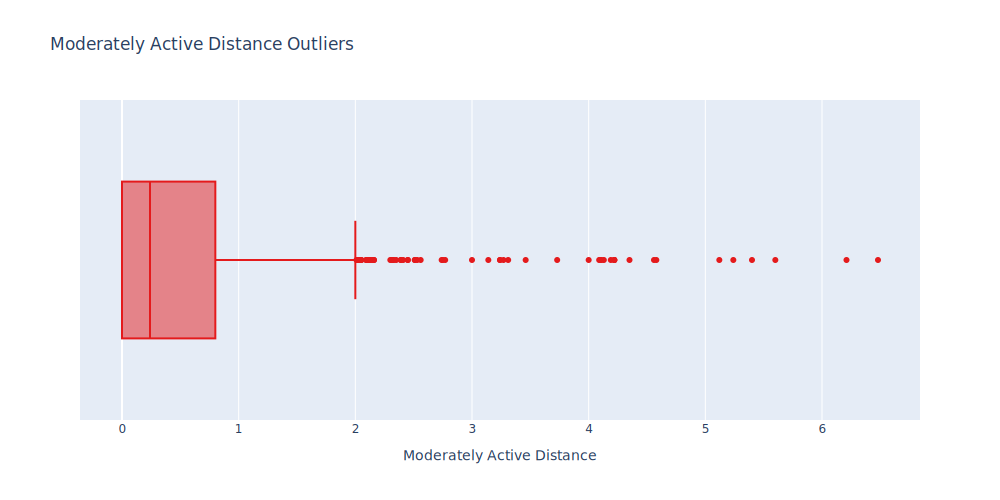

In [66]:
view_box(daily_activity, 'ModeratelyActiveDistance', 'Moderately Active Distance Outliers', 'ModeratelyActiveDistance', 'Moderately Active Distance')

>It seems that the **Moderately Active Distances has a median of 0.24 kms.**

* **Light Active Distance:**

count    940.000000
mean       3.340819
std        2.040655
min        0.000000
25%        1.945000
50%        3.365000
75%        4.782500
max       10.710000
Name: LightActiveDistance, dtype: float64


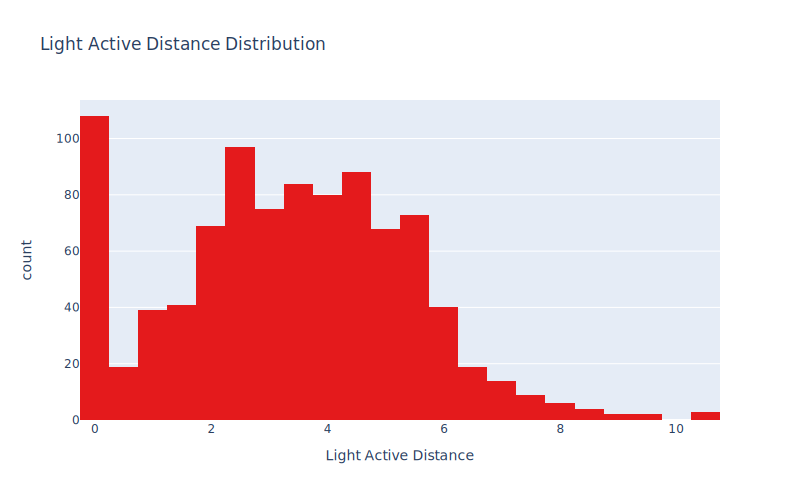

In [67]:
print(daily_activity['LightActiveDistance'].describe())
view_distribution(daily_activity, 'LightActiveDistance', 'Light Active Distance Distribution','LightActiveDistance', 'Light Active Distance')

>I can see that the **distribution of the light active distances values here are more normal, not too much short of distances, and not too long**, except for some distant outlier short distance values. I can also check out the skewness of this column.

In [68]:
col_skw.iloc[5:6]

LightActiveDistance    0.182247
dtype: float64

>The skewness factor clearly shows how much the plot is of a normal distribution compared to the other intensities as the skewness factor is ever so slightly above the ideal normal distribution skewness factor of zero.

Let's check out a brief statistics on a box plot of the Light Active Distance. 

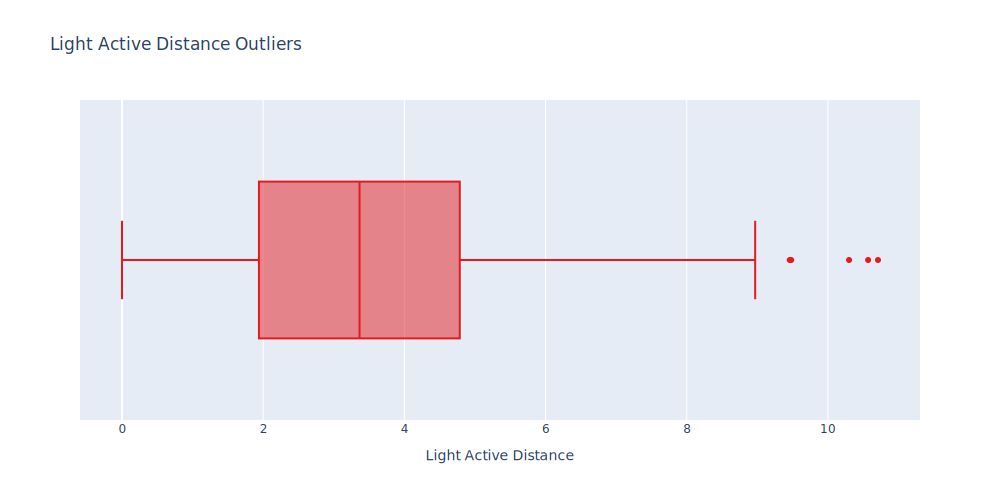

In [69]:
view_box(daily_activity, 'LightActiveDistance', 'Light Active Distance Outliers','LightActiveDistance', 'Light Active Distance')

>It seems that the **Light Active Distances has a median of 3.36 kms.**

* **Sedentary Active Distance:**

count    940.000000
mean       0.001606
std        0.007346
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.110000
Name: SedentaryActiveDistance, dtype: float64


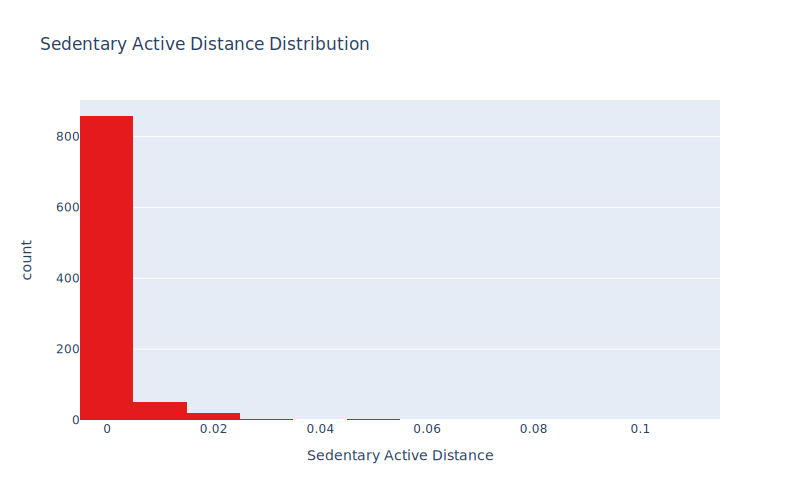

In [70]:
print(daily_activity['SedentaryActiveDistance'].describe())
view_distribution(daily_activity, 'SedentaryActiveDistance', 'Sedentary Active Distance Distribution','SedentaryActiveDistance', 'Sedentary Active Distance')

>I can see that the **distribution of the sedentary active distances values is very right skewed as most of the values equal zero, which is normal**, except for some values of very short distances. I can also check out the skewness of this column.

In [71]:
col_skw.iloc[6:7]

SedentaryActiveDistance    8.589899
dtype: float64

>The skewness clearly shows how much the plot is right skewed.

* **Activity Distance Distribution:**

First, I want to calculate the percnetage of each intensity of the total distances taken, but before that, I'll create a new column that sums up the active distances for different intensities, and then compare it to the 'TotalDistance' column to see if there are any, even slight differences between them, I'll call it 'ActivityDistance'.

In [72]:
daily_activity['ActivtyDistance'] = daily_activity['VeryActiveDistance'] + daily_activity['ModeratelyActiveDistance'] + daily_activity['LightActiveDistance'] + daily_activity['SedentaryActiveDistance']

Let's compare them:

In [73]:
daily_activity[['ActivtyDistance', 'TotalDistance']]

,ActivtyDistance,TotalDistance
0,8.49,8.500000
1,6.97,6.970000
2,6.75,6.740000
3,6.23,6.280000
4,8.16,8.160000
...,...,...
935,8.08,8.110000
936,18.19,18.250000
937,8.09,8.150000
938,19.52,19.559999


Now let's see when do they exactly equal each other:

In [74]:
daily_activity[['ActivtyDistance', 'TotalDistance']][daily_activity['ActivtyDistance'] == daily_activity['TotalDistance']]

,ActivtyDistance,TotalDistance
30,0.00,0.00
31,5.31,5.31
32,4.55,4.55
35,3.49,3.49
38,1.90,1.90
...,...,...
904,0.00,0.00
905,0.00,0.00
906,0.00,0.00
907,0.00,0.00


And let's see when do they differ:

In [75]:
daily_activity[['ActivtyDistance', 'TotalDistance']][daily_activity['ActivtyDistance'] != daily_activity['TotalDistance']]

,ActivtyDistance,TotalDistance
0,8.49,8.500000
1,6.97,6.970000
2,6.75,6.740000
3,6.23,6.280000
4,8.16,8.160000
...,...,...
935,8.08,8.110000
936,18.19,18.250000
937,8.09,8.150000
938,19.52,19.559999


In [76]:
val=daily_activity[['ActivtyDistance', 'TotalDistance']][daily_activity['ActivtyDistance'] != daily_activity['TotalDistance']].shape[0]
percent=val/(daily_activity.shape[0])*100
print(f'This number of rows where there are differences between "TotalDistance" & "ActivtyDistance" is {val} rows, and this represents {percent:.2f}% of the original dataset rows number.')

This number of rows where there are differences between "TotalDistance" & "ActivtyDistance" is 636 rows, and this represents 67.66% of the original dataset rows number.


Let's check the range of differences between the two columns, and see the percentages and count of every variation when rounded.

0.0 records 901 times 
With a percentage of 95.85% 
 

0.1 records 19 times 
With a percentage of 2.02% 
 

0.2 records 3 times 
With a percentage of 0.32% 
 

0.8 records 1 times 
With a percentage of 0.11% 
 

5.2 records 1 times 
With a percentage of 0.11% 
 

3.1 records 1 times 
With a percentage of 0.11% 
 

2.1 records 1 times 
With a percentage of 0.11% 
 

7.8 records 1 times 
With a percentage of 0.11% 
 

3.9 records 1 times 
With a percentage of 0.11% 
 

0.3 records 2 times 
With a percentage of 0.21% 
 

8.0 records 1 times 
With a percentage of 0.11% 
 

1.8 records 1 times 
With a percentage of 0.11% 
 

4.2 records 1 times 
With a percentage of 0.11% 
 

2.3 records 1 times 
With a percentage of 0.11% 
 

0.6 records 1 times 
With a percentage of 0.11% 
 

6.6 records 1 times 
With a percentage of 0.11% 
 

9.4 records 1 times 
With a percentage of 0.11% 
 

2.8 records 1 times 
With a percentage of 0.11% 
 

8.5 records 1 times 
With a percentage of 0.11% 
 



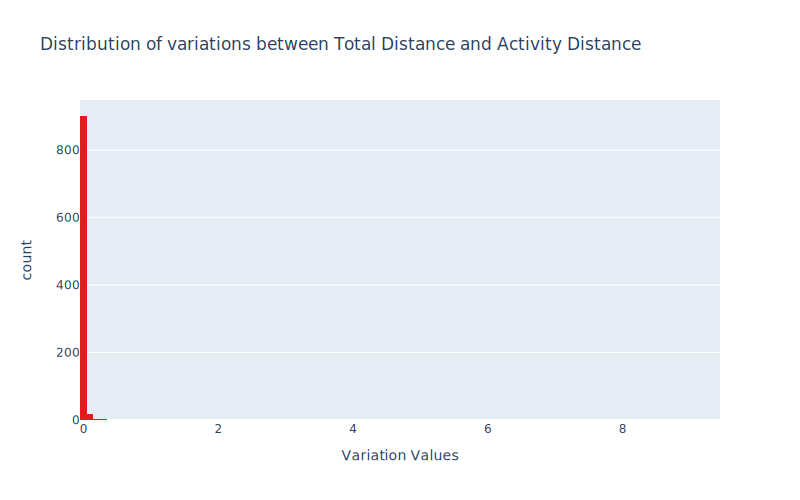

In [77]:
daily_activity['diff'] = daily_activity['TotalDistance'] - daily_activity['ActivtyDistance']
daily_activity['diff'] = daily_activity['diff'].round(1)
view_percentages(daily_activity, 'diff')
view_distribution(daily_activity, 'diff', 'Distribution of variations between Total Distance and Activity Distance', 'diff', 'Variation Values')

>It seems that **most of the columns don't have much of a difference as zero records 95.85% of the rows. So I'll use the 'ActivtyDistance' in the different intensities distribution I'll plot below.**

In [78]:
daily_activity = daily_activity[['Id', 'ActivityDate', 'ActivityDay', 'TotalSteps', 'StepsLevel',
       'TotalDistance', 'DistanceLevel', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'TotalActivityMinutes', 'VeryActiveMinutes',
       'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes',
       'VeryActiveSpeed(m/s)', 'ModeratelyActiveSpeed(m/s)',
       'LightlyActiveSpeed(m/s)', 'Calories', 'CaloriesLevel',
       'TotalMinutesAsleep', 'SleepLevel', 'TotalTimeInBed', 'BedNoSleep',
       'WeightKg', 'ActivtyDistance']]

Very Active Distance represent 27.76%
Moderately Active Distance represents 10.49%
Light Active Distance represent 61.72%.


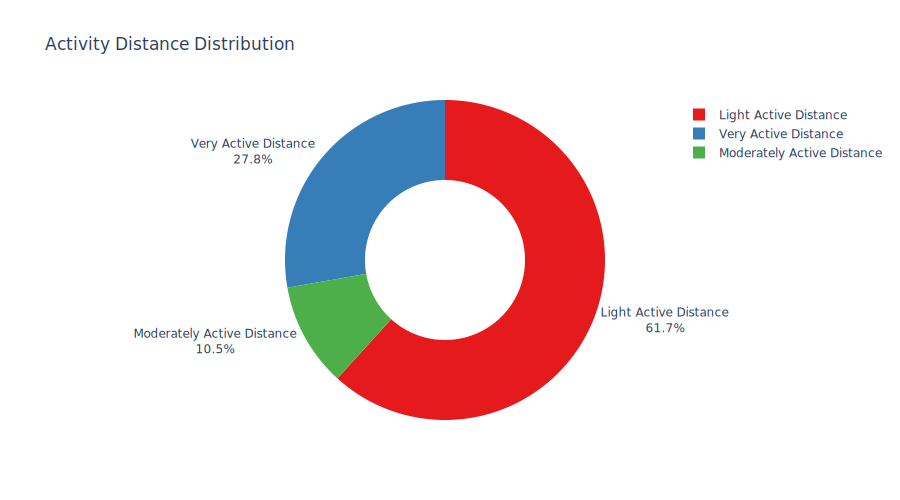

In [79]:
v = daily_activity['VeryActiveDistance'].mean()
m = daily_activity['ModeratelyActiveDistance'].mean()
l = daily_activity['LightActiveDistance'].mean()
a = daily_activity['ActivtyDistance'].mean()
array = [v, m, l]
array_names = ['Very Active Distance', 'Moderately Active Distance', 'Light Active Distance']
df = pd.DataFrame(list(zip(array_names, array)), columns=['activity_distance','average_activity_distance'])
vp = v/a*100
mp = m/a*100
lp = l/a*100

print(f'Very Active Distance represent {vp:.2f}%\nModerately Active Distance represents {mp:.2f}%\nLight Active Distance represent {lp:.2f}%.')
px.pie(df, values='average_activity_distance', names='activity_distance', hole=0.5, width=900, title='Activity Distance Distribution', 
       labels={'average_activity_distance':'Average Activity Distance'}, 
       color_discrete_sequence=px.colors.qualitative.Set1).update_traces(
           textposition='outside', textinfo='percent+label')

>I see that **most of the distacnes taken were from the Light Active Distance (61.7%), followed by Very Active Distance (27.8%), and Moderately Active Distance takes the third place (10.5%)**.

* **Very Active Minutes:**

count    940.000000
mean      21.164894
std       32.844803
min        0.000000
25%        0.000000
50%        4.000000
75%       32.000000
max      210.000000
Name: VeryActiveMinutes, dtype: float64


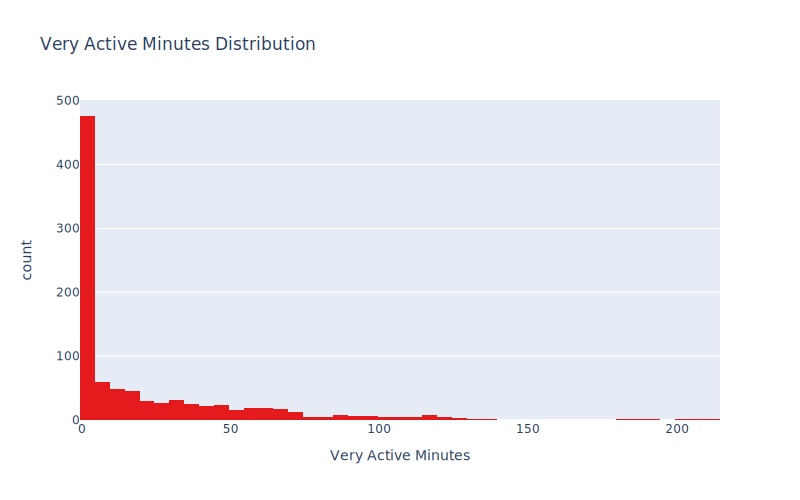

In [80]:
print(daily_activity['VeryActiveMinutes'].describe())
view_distribution(daily_activity, 'VeryActiveMinutes', 'Very Active Minutes Distribution','VeryActiveMinutes', 'Very Active Minutes')

Let's check out the largest value count in this column, which is the value zero.

In [81]:
daily_activity[['TotalActivityMinutes', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes','SedentaryMinutes']][daily_activity['VeryActiveMinutes']==0]

,TotalActivityMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
30,1440,0,0,0,1440
31,1440,0,0,146,1294
32,1440,0,0,148,1292
33,1440,0,0,236,1204
34,1440,0,0,96,1344
...,...,...,...,...,...
905,1440,0,0,0,1440
906,1440,0,0,0,1440
907,1440,0,0,0,1440
908,48,0,0,0,48


>The values are equal to zero when the participant is doing other intensity activities, so I will not remove them from the dataset. The same scenario goes for all other intensity columns.

>I can also see from the histogram above that there are some very distant outlier values, as assured in the box plot below, I'll check these out and compare them to the outliers of the very active distances.

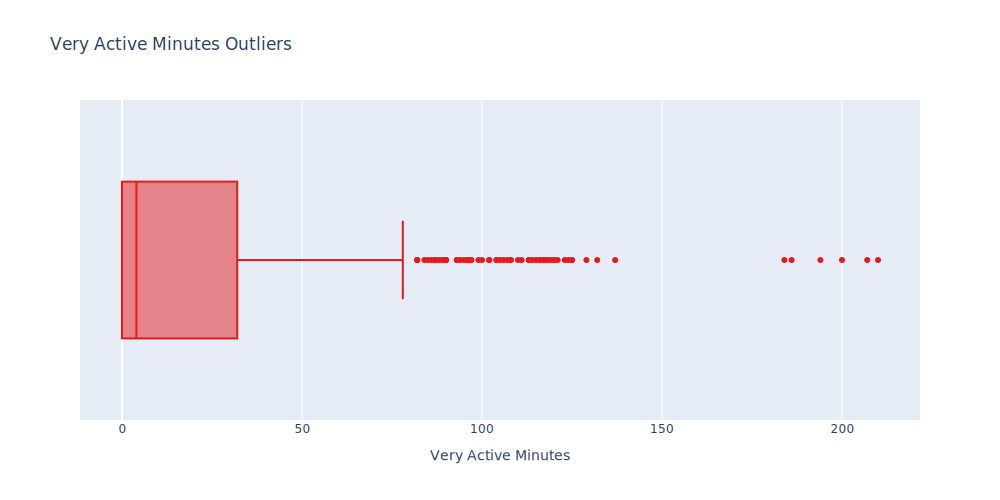

In [82]:
view_box(daily_activity, 'VeryActiveMinutes', 'Very Active Minutes Outliers', 'VeryActiveMinutes', 'Very Active Minutes')

In [83]:
daily_activity[['Id', 'ActivityDate', 'ActivityDay', 'TotalSteps','TotalDistance', 'VeryActiveDistance', 'TotalActivityMinutes', 'VeryActiveMinutes', 'VeryActiveSpeed(m/s)', 'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg']][daily_activity['VeryActiveMinutes'] > 170]

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveDistance,TotalActivityMinutes,VeryActiveMinutes,VeryActiveSpeed(m/s),Calories,TotalMinutesAsleep,TotalTimeInBed,WeightKg
50,1624580081,2016-05-01,Sunday,36019,28.030001,21.92,1440,186,1.96,2690,NaN,NaN,NaN
571,5577150313,2016-04-16,Saturday,14269,10.660000,6.64,870,184,0.60,4274,406.0,445.0,NaN
572,5577150313,2016-04-17,Sunday,12231,9.140000,5.98,921,200,0.50,4552,549.0,583.0,90.699997
579,5577150313,2016-04-24,Sunday,15764,11.780000,7.65,841,210,0.61,4392,543.0,615.0,NaN
585,5577150313,2016-04-30,Saturday,12363,9.240000,5.83,1036,207,0.47,4501,412.0,433.0,NaN
586,5577150313,2016-05-01,Sunday,13368,9.990000,5.31,943,194,0.46,4546,379.0,398.0,NaN


In [84]:
daily_activity[['Id', 'ActivityDate', 'ActivityDay', 'TotalSteps','TotalDistance', 'VeryActiveDistance','VeryActiveMinutes', 'VeryActiveSpeed(m/s)', 'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg']][daily_activity['VeryActiveDistance'] > 20]

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,VeryActiveSpeed(m/s),Calories,TotalMinutesAsleep,TotalTimeInBed,WeightKg
50,1624580081,2016-05-01,Sunday,36019,28.030001,21.92,186,1.96,2690,NaN,NaN,NaN
927,8877689391,2016-04-30,Saturday,27745,26.719999,21.66,124,2.91,4398,NaN,NaN,85.5


>I can see that there is **one record in both value outliers, the one on 2016-05-01 by the user Id 1624580081**, which is a predictable outcome as the more the very active minutes, the more the very active distance. 

>But the second very active distance outlier have been done in a much shorter period than what is to be expected (registered 124 minutes which is not a very distant outlier in the very active minutes column), that might be due to the speed at which this activity was done, meaning it was much greater compared to the other value (as seen in the speed column, 2.91 m/s compared to 1.96 m/s).

>As for the rest of the values in the first table when the very active minutes were much larger that the usual, they all seem to have registered much lower distances compared to the first outlier value, resulting in a much lower speed pace, causing them showing up as outliers in the first table of the very active minutes outliers, but not showing up in the second table of the very active distance outliers.

>Another trend I've noticed in both tables above, is that all these outlier values have been registred only in weekends.

>Overall, I can see that the distribution is right skewed, meaning that **most of the very active minutes were short periods**, except for some very distant outlier values that occurred in the weekends.

* **Fairly Active Minutes:**

count    940.000000
mean      13.564894
std       19.987404
min        0.000000
25%        0.000000
50%        6.000000
75%       19.000000
max      143.000000
Name: FairlyActiveMinutes, dtype: float64


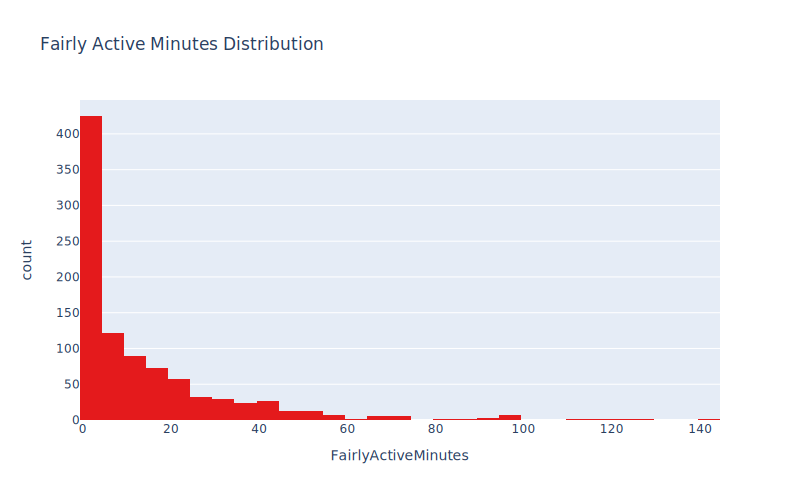

In [85]:
print(daily_activity['FairlyActiveMinutes'].describe())
view_distribution(daily_activity, 'FairlyActiveMinutes', 'Fairly Active Minutes Distribution','FairlyActiveMinutes', 'FairlyActiveMinutes')

>I can see that the distribution is right skewed here too, indicating that **most of the fairly active minutes spent were short periods**, except for some distant outlier values. But a little more right skewed than the very active minutes distribution as seen in the skewness table below (meaning more short moderately active minutes compared to that of the very active minutes).

In [86]:
col_skw = daily_activity.skew(axis = 0, skipna = True)
col_skw.iloc[8:10]

VeryActiveMinutes      2.176143
FairlyActiveMinutes    2.479492
dtype: float64

* **Lightly Active Minutes:**

count    940.000000
mean     192.812766
std      109.174700
min        0.000000
25%      127.000000
50%      199.000000
75%      264.000000
max      518.000000
Name: LightlyActiveMinutes, dtype: float64


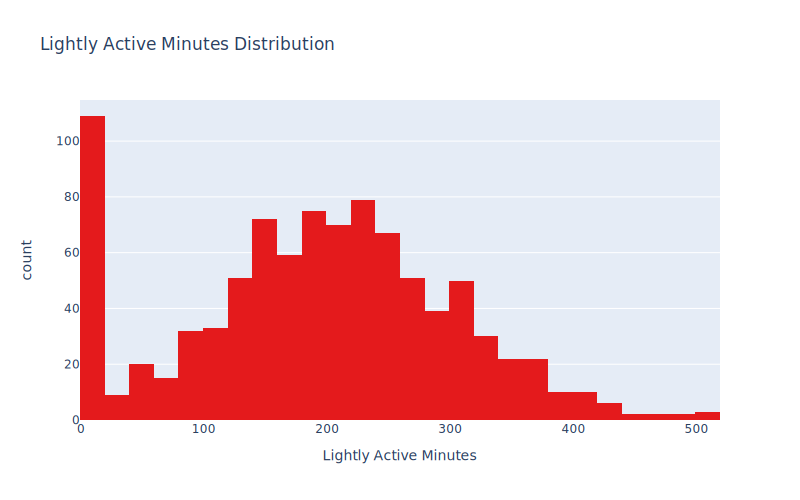

In [87]:
print(daily_activity['LightlyActiveMinutes'].describe())
view_distribution(daily_activity, 'LightlyActiveMinutes', 'Lightly Active Minutes Distribution','LightlyActiveMinutes', 'Lightly Active Minutes')

>I can see that the **distribution of the light active minutes values here is more normal, not too short of periods, and not too long**, except for some distant outlier values. I can also check out the skewness of this column.

In [88]:
col_skw.iloc[10:11]

LightlyActiveMinutes   -0.037929
dtype: float64

>The skewness factor clearly shows how much the plot is of a normal distribution compared to the other intensities as the skewness factor is ever so slightly below the ideal normal distribution skewness factor of zero.

* **Sedentary Minutes:**

count     940.000000
mean      991.210638
std       301.267437
min         0.000000
25%       729.750000
50%      1057.500000
75%      1229.500000
max      1440.000000
Name: SedentaryMinutes, dtype: float64


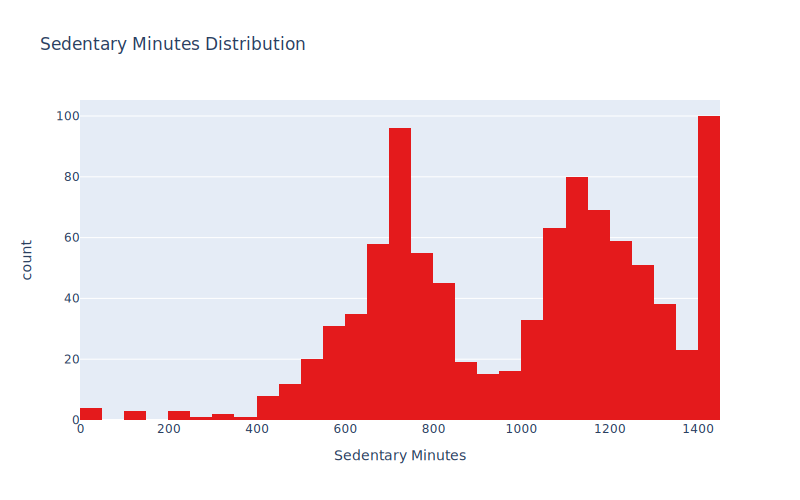

In [89]:
print(daily_activity['SedentaryMinutes'].describe())
view_distribution(daily_activity, 'SedentaryMinutes', 'Sedentary Minutes Distribution','SedentaryMinutes', 'Sedentary Minutes')

>I can see that the **distribution of the sedentary active minutes values is close to a normal distribution, as most of the periods aren't too long, nor too short**. I can also check out the skewness of this column.

In [90]:
col_skw.iloc[11:12]

SedentaryMinutes   -0.294498
dtype: float64

>The skewness factor clearly shows how much the plot is of a normal distribution compared to the other intensities as the skewness factor is ever so slightly below the ideal normal distribution skewness factor of zero.

* **Active Minutes Distribution:**

Now I'll also create a new column that sums up the active minutes for different intensities to use to check the different intensities distribution compared to the total minutes registered.

In [91]:
daily_activity['ActivtyMinutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes'] + daily_activity['SedentaryMinutes']
daily_activity = daily_activity[['Id', 'ActivityDate', 'ActivityDay', 'TotalSteps', 'StepsLevel',
       'TotalDistance', 'DistanceLevel', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'TotalActivityMinutes', 'VeryActiveMinutes',
       'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes',
       'VeryActiveSpeed(m/s)', 'ModeratelyActiveSpeed(m/s)',
       'LightlyActiveSpeed(m/s)', 'Calories', 'CaloriesLevel',
       'TotalMinutesAsleep', 'SleepLevel', 'TotalTimeInBed', 'BedNoSleep',
       'WeightKg', 'ActivtyDistance', 'ActivtyMinutes']]

Very Active Minutes represent 1.74%
Fairly Active Minutes represents 1.11%
Light Active Minutes represent 15.82%
Sedentary Minutes represent 81.33%.


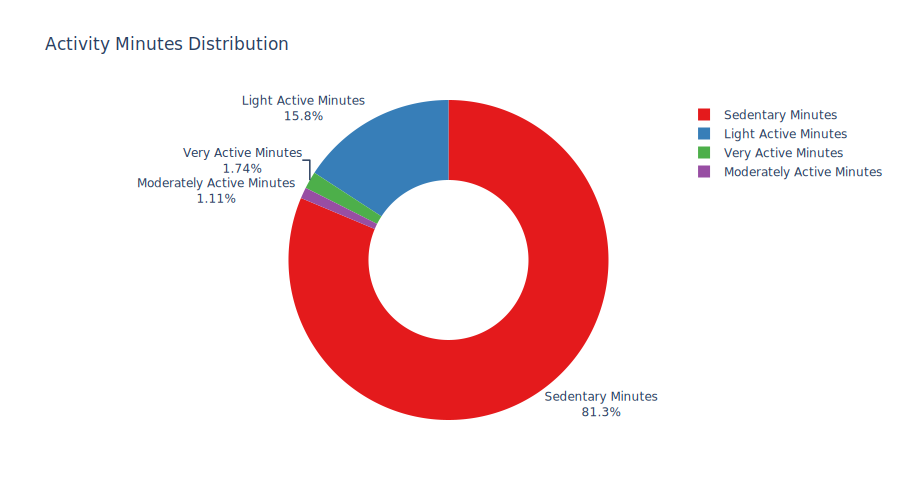

In [92]:
vm = daily_activity['VeryActiveMinutes'].mean()
mm = daily_activity['FairlyActiveMinutes'].mean()
lm = daily_activity['LightlyActiveMinutes'].mean()
sm = daily_activity['SedentaryMinutes'].mean()
am = daily_activity['ActivtyMinutes'].mean()
arraym = [vm, mm, lm, sm]
arraym_names_m = ['Very Active Minutes', 'Moderately Active Minutes', 'Light Active Minutes', 'Sedentary Minutes']
dfm = pd.DataFrame(list(zip(arraym_names_m, arraym)), columns=['activity_minutes','average_activity_minutes'])
vpm = vm/am*100
mpm = mm/am*100
lpm = lm/am*100
spm = sm/am*100

print(f'Very Active Minutes represent {vpm:.2f}%\nFairly Active Minutes represents {mpm:.2f}%\nLight Active Minutes represent {lpm:.2f}%\nSedentary Minutes represent {spm:.2f}%.')
px.pie(dfm, values='average_activity_minutes', names='activity_minutes', hole=0.5, width=900, title='Activity Minutes Distribution', 
       labels={'average_activity_minutes':'Average Activity Minutes'}, 
       color_discrete_sequence=px.colors.qualitative.Set1).update_traces(
           textposition='outside', textinfo='percent+label')

>I see that **most of the minutes spent were Sedentary Minutes (81.3%), followed by Light Active Minutes (15.8%), then Very Active Minutes (1.74%), and Moderately Active Minutes takes the last place (1.11%)**.

* **User Activity Speed:**

count    531.000000
mean       1.186234
std        0.450330
min        0.000000
25%        1.030000
50%        1.190000
75%        1.360000
max        2.910000
Name: VeryActiveSpeed(m/s), dtype: float64


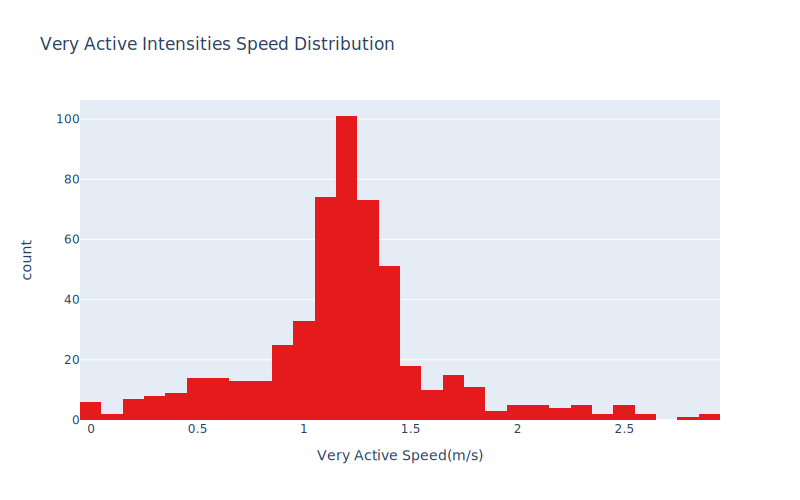

In [93]:
print(daily_activity['VeryActiveSpeed(m/s)'].describe())
view_distribution(daily_activity, 'VeryActiveSpeed(m/s)', 'Very Active Intensities Speed Distribution','VeryActiveSpeed(m/s)', 'Very Active Speed(m/s)')

>From the distribution plot above, I can see that **most of the speed values lie between 1.15 meter/second and 1.24 meter/second, with a mean value of 1.186 meter/second**.

count    556.000000
mean       0.702770
std        0.220825
min        0.000000
25%        0.600000
50%        0.730000
75%        0.830000
max        1.640000
Name: ModeratelyActiveSpeed(m/s), dtype: float64


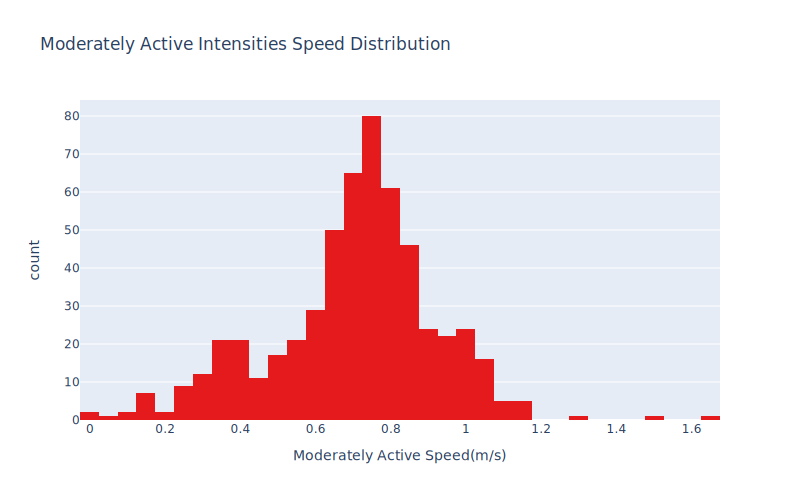

In [94]:
print(daily_activity['ModeratelyActiveSpeed(m/s)'].describe())
view_distribution(daily_activity, 'ModeratelyActiveSpeed(m/s)', 'Moderately Active Intensities Speed Distribution','ModeratelyActiveSpeed(m/s)', 'Moderately Active Speed(m/s)')

>From the distribution plot above, I can see that **most of the speed values lie between 0.73 meter/second and 0.77 meter/second, with a mean value of 0.70 meter/second**.

count    856.000000
mean       0.286916
std        0.081535
min        0.000000
25%        0.230000
50%        0.280000
75%        0.330000
max        0.610000
Name: LightlyActiveSpeed(m/s), dtype: float64


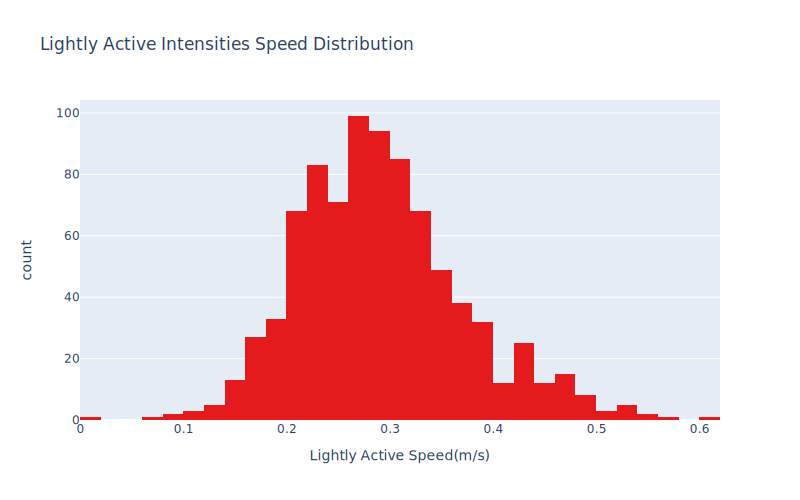

In [95]:
print(daily_activity['LightlyActiveSpeed(m/s)'].describe())
view_distribution(daily_activity, 'LightlyActiveSpeed(m/s)', 'Lightly Active Intensities Speed Distribution','LightlyActiveSpeed(m/s)', 'Lightly Active Speed(m/s)')

>From the distribution plot above, I can see that **most of the speed values lie between 0.26 meter/second and 0.27 meter/second, with a mean value of 0.287 meter/second**.

* **Calories:**

count     940.000000
mean     2303.609574
std       718.166862
min         0.000000
25%      1828.500000
50%      2134.000000
75%      2793.250000
max      4900.000000
Name: Calories, dtype: float64


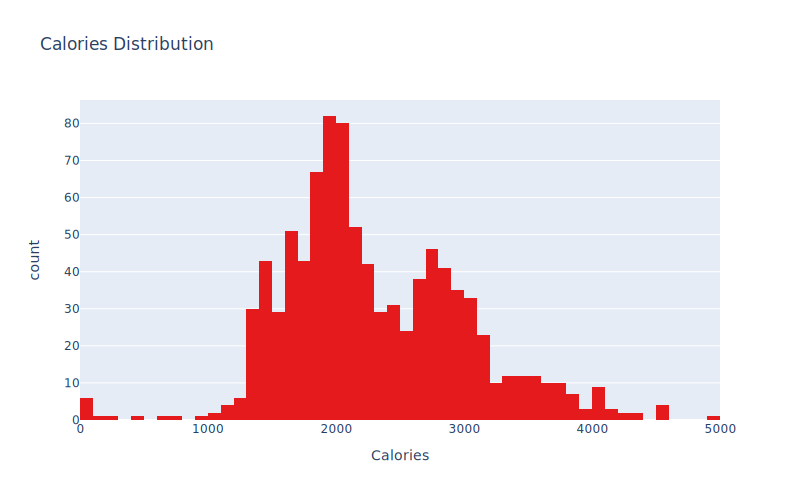

In [96]:
print(daily_activity['Calories'].describe())
view_distribution(daily_activity, 'Calories', 'Calories Distribution','Calories', 'Calories')

>From the plot above, I can see that **most of the burnt calories fall between 1000 calories and 3000 calories, peaking at the value range of 1900 to 2099 calories burnt**.

* **Total Minutes Asleep:**

count    410.000000
mean     419.173171
std      118.635918
min       58.000000
25%      361.000000
50%      432.500000
75%      490.000000
max      796.000000
Name: TotalMinutesAsleep, dtype: float64


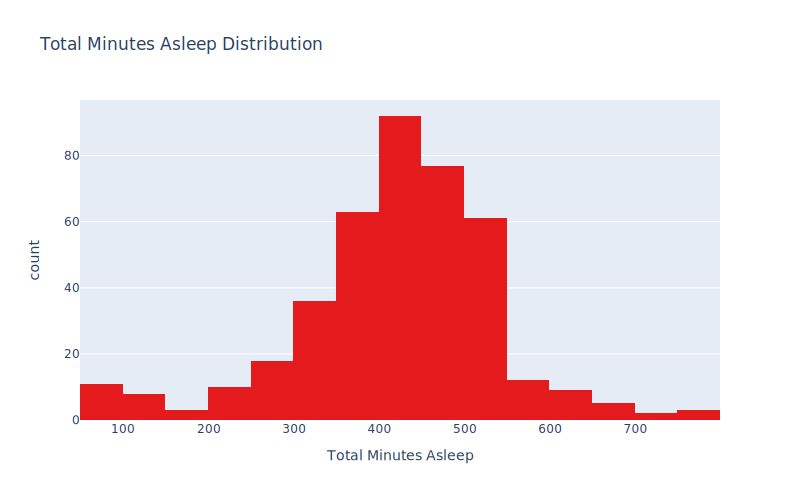

In [97]:
print(daily_activity[daily_activity['TotalMinutesAsleep'].notna()]['TotalMinutesAsleep'].describe())
view_distribution(daily_activity[daily_activity['TotalMinutesAsleep'].notna()], 'TotalMinutesAsleep', 'Total Minutes Asleep Distribution','TotalMinutesAsleep', 'Total Minutes Asleep')

>From the plot above, I can see that **sleeping hours were mostly less than 9 hours (549 minutes), more than half of them fall into the 7 to 9 hours asleep category (400 to 549 minues)**.

* **Total Time In Bed & Bed No Sleep:**

count    410.000000
mean     458.482927
std      127.455140
min       61.000000
25%      403.750000
50%      463.000000
75%      526.000000
max      961.000000
Name: TotalTimeInBed, dtype: float64


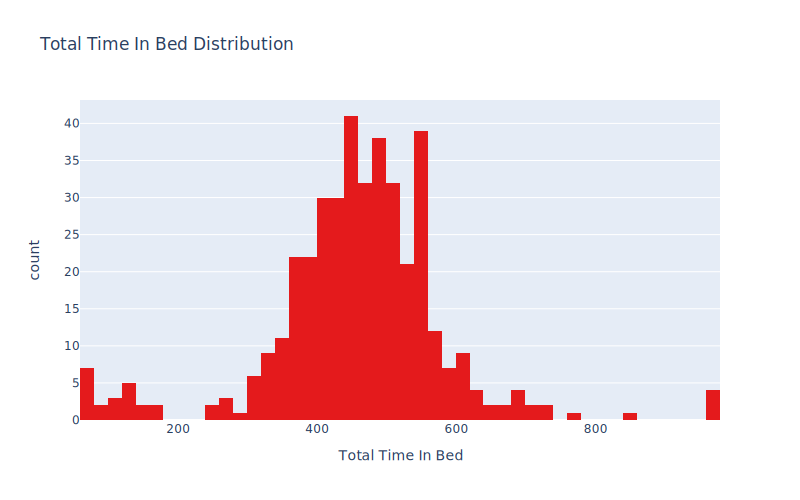

In [98]:
print(daily_activity['TotalTimeInBed'].describe())
view_distribution(daily_activity, 'TotalTimeInBed', 'Total Time In Bed Distribution','TotalTimeInBed', 'Total Time In Bed')

>From the plots above, I can see that **the time spent in bed was mostly similar that the minutes spent asleep, meaning more than 7 hours and less than 9 hours (420 minutes to 559 minutes)**.

count    410.000000
mean      39.309756
std       46.710932
min        0.000000
25%       17.000000
50%       25.500000
75%       40.000000
max      371.000000
Name: BedNoSleep, dtype: float64


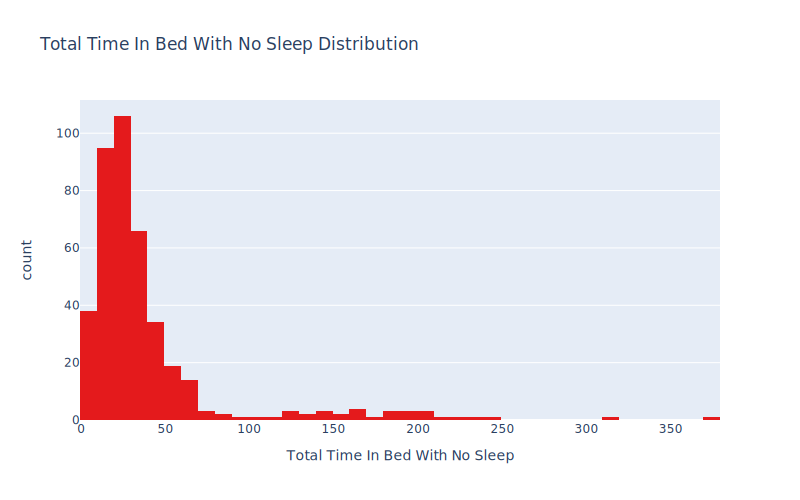

In [99]:
print(daily_activity['BedNoSleep'].describe())
view_distribution(daily_activity, 'BedNoSleep', 'Total Time In Bed With No Sleep Distribution','BedNoSleep', 'Total Time In Bed With No Sleep ')

>From the above right skewed plot, I can see that **most of the no sleep time is bed lies between 0 and 70 minutes, with a mean of 39.3 minutes**, with some very distant outlier values as I can see in the below box plot.

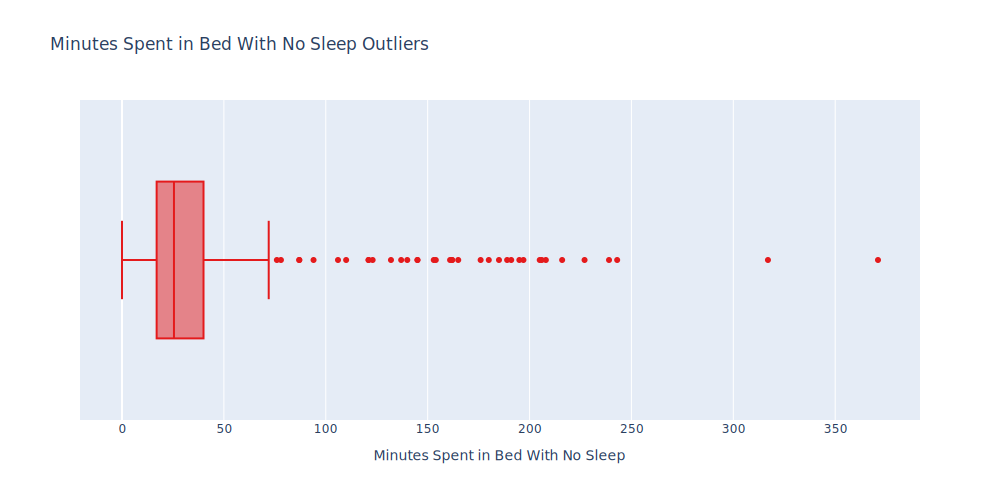

In [100]:
view_box(daily_activity, 'BedNoSleep', 'Minutes Spent in Bed With No Sleep Outliers', 'BedNoSleep', 'Minutes Spent in Bed With No Sleep')

>For the above box plot, I can notice that mostly the users didn't take too much time to fall asleep (with a mean of 40 minutes), except for some instances where users stayed in bed for too long before falling asleep (values ranging from 72 minutes till 371 minutes -more than 6 hours-)

* **Weight In Kilograms :**

>A univariate exploration of the Weight Column would be reduntant, so I'll not do an exploration of it.

### **4.2. Bivariate Exploration Data Analysis**

  Now I will explore the relations between different variables in the dataset.

* **Bivariate Exploration with Activity Days:**

**Activity Days vs Steps Level:**

Let's check every Steps Level across weekdays:

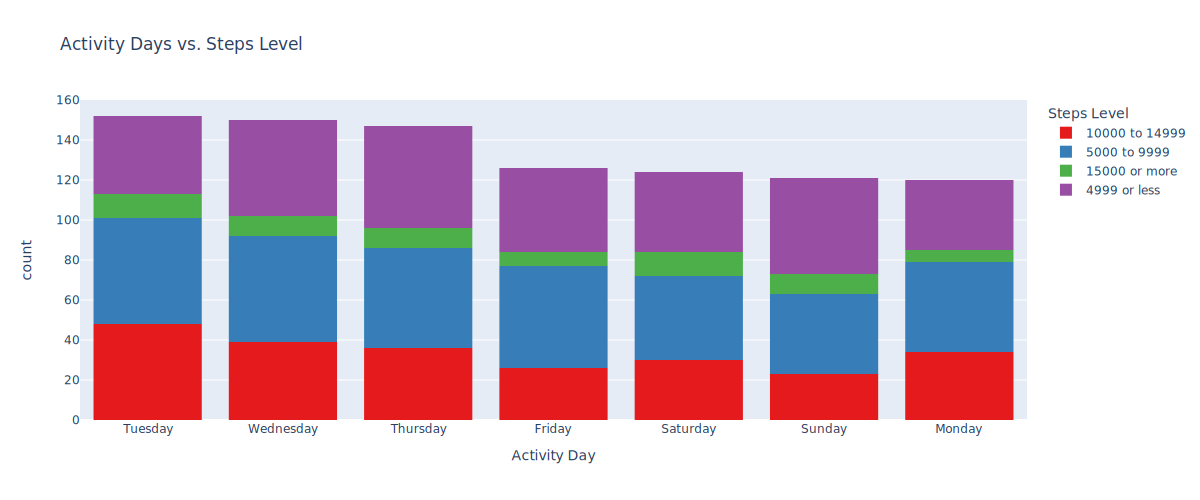

In [101]:
px.histogram(daily_activity[daily_activity['StepsLevel'].notna()], x='ActivityDay', color='StepsLevel', width=1200, title='Activity Days vs. Steps Level', labels={'StepsLevel':'Steps Level','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1).update_xaxes(categoryorder='total descending')

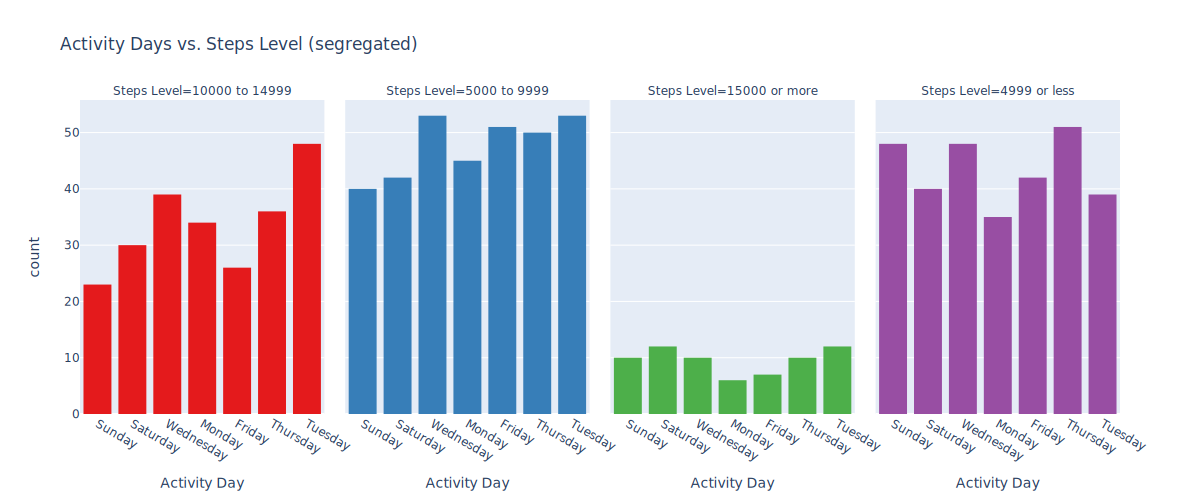

In [102]:
px.histogram(daily_activity[daily_activity['StepsLevel'].notna()], x='ActivityDay', color='StepsLevel', width=1200, facet_col='StepsLevel', title='Activity Days vs. Steps Level (segregated)', labels={'StepsLevel':'Steps Level','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1).update_xaxes(categoryorder='total descending').update_layout(showlegend=False)

>I notice a **flucuation every other day in the steps level 4999 or less**.

>Most of the steps levels **from 5000 to 9999 steps taken in a day are leaning away from the weekends and more towards Tuesdays and Wednesdays** making them both have the first spots.

>**Tuesday has the first spot for steps from 10000 to 14999 taken in a day**, with **less levels of steps taken towards and through the weekends**.

>I can see that most of the level of **more than 15000 steps taken in a day, while not much, are concentrated in weekends and mid weeks, particularly on Tuesdays and Saturdays**.

>Overall, **Tuesday seems to be the preferable day for users when they want to walk more than 5000 steps a day.**

**Activity Days vs Distance Level:**

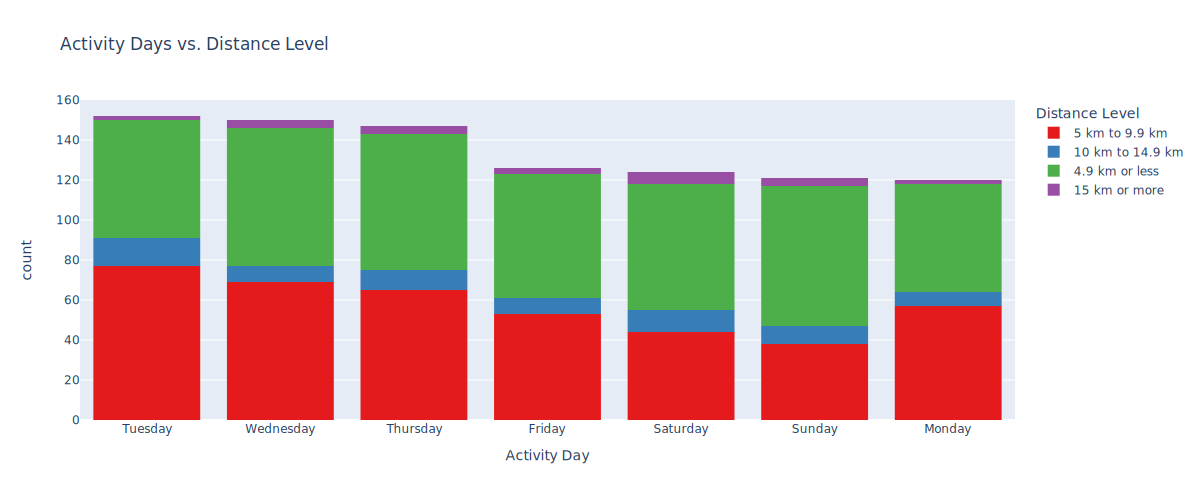

In [103]:
px.histogram(daily_activity[daily_activity['DistanceLevel'].notna()], x='ActivityDay', color='DistanceLevel', width=1200, title='Activity Days vs. Distance Level', labels={'DistanceLevel':'Distance Level','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1).update_xaxes(categoryorder='total descending')

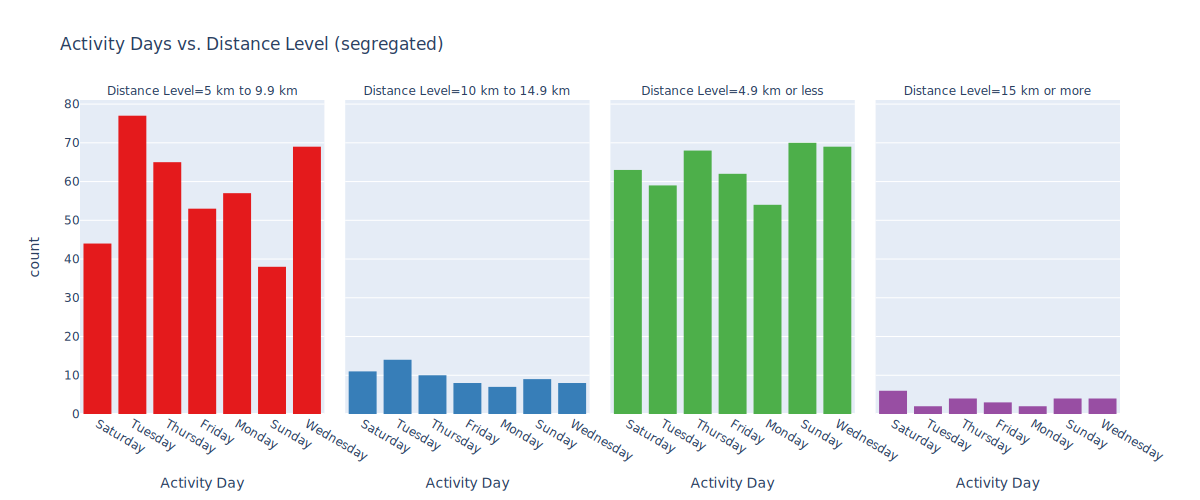

In [104]:
px.histogram(daily_activity[daily_activity['DistanceLevel'].notna()], x='ActivityDay', color='DistanceLevel', width=1200, facet_col='DistanceLevel', title='Activity Days vs. Distance Level (segregated)', labels={'DistanceLevel':'Distance Level','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1).update_xaxes(categoryorder='total descending').update_layout(showlegend=False)

>Here I notice a **flucuation every other day similar to the distance levels that are less 4.9 km or less in a day.**

>Most of the distance levels **from 5km to 9.9km walked in a day are leaning away from the weekends and more towards Tuesdays and Wednesdays** making them both have the leading spots.

>**Tuesday here also has the first spot for steps from 10km to 14.9km walked in a day**, with **less levels of steps taken towards and through the weekends.**

>Overall, **Tuesday and Wednesday seem to be the preferable days for users when they want to walk less than 15 kms a day**

>I can see that most of the distance level of **more than 15 km walked in a day, while not much, are concentrated in weekends and mid weeks, particularly on Saturdays.**

**Activity Days vs Distance Intensities:**

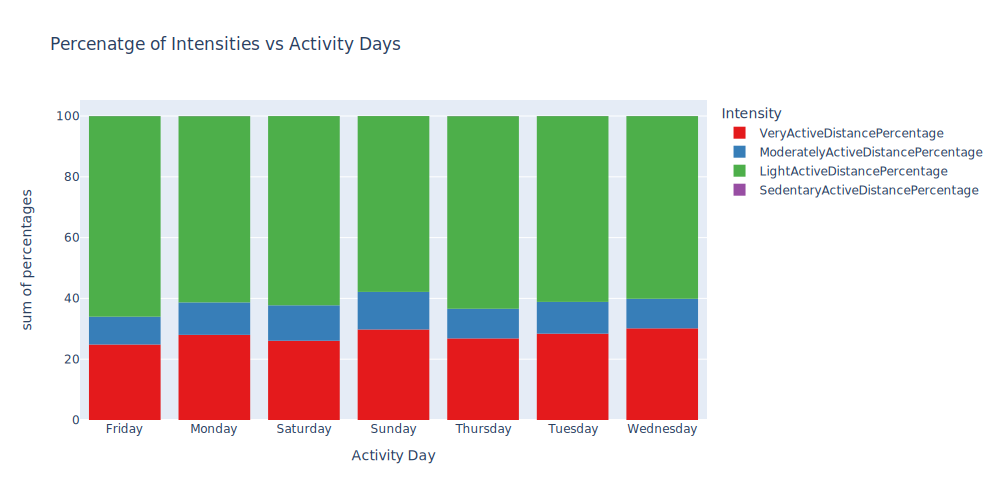

In [105]:
ActivityDay_Intensities = daily_activity.groupby('ActivityDay')['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance','SedentaryActiveDistance'].sum().reset_index()
ActivityDay_Intensities['TotalIntensityDistance'] = ActivityDay_Intensities['VeryActiveDistance'] + ActivityDay_Intensities['ModeratelyActiveDistance'] + ActivityDay_Intensities['LightActiveDistance'] + ActivityDay_Intensities['SedentaryActiveDistance']
ActivityDay_Intensities['VeryActiveDistancePercentage'] = (ActivityDay_Intensities['VeryActiveDistance']/ActivityDay_Intensities['TotalIntensityDistance'])*100
ActivityDay_Intensities['ModeratelyActiveDistancePercentage'] = (ActivityDay_Intensities['ModeratelyActiveDistance']/ActivityDay_Intensities['TotalIntensityDistance'])*100
ActivityDay_Intensities['LightActiveDistancePercentage'] = (ActivityDay_Intensities['LightActiveDistance']/ActivityDay_Intensities['TotalIntensityDistance'])*100
ActivityDay_Intensities['SedentaryActiveDistancePercentage'] = (ActivityDay_Intensities['SedentaryActiveDistance']/ActivityDay_Intensities['TotalIntensityDistance'])*100
ActivityDay_Intensities['TotalIntensityDistancePercentage'] = ActivityDay_Intensities['VeryActiveDistancePercentage'] + ActivityDay_Intensities['ModeratelyActiveDistancePercentage'] + ActivityDay_Intensities['LightActiveDistancePercentage'] + ActivityDay_Intensities['SedentaryActiveDistancePercentage']
ActivityDayIntensitiesMelted = ActivityDay_Intensities.melt(id_vars='ActivityDay', value_vars=['VeryActiveDistancePercentage', 'ModeratelyActiveDistancePercentage', 'LightActiveDistancePercentage', 'SedentaryActiveDistancePercentage'], var_name='Intensity', value_name='percentages')
px.histogram(ActivityDayIntensitiesMelted, x='ActivityDay', y='percentages', color='Intensity', width=1000, title='Percenatge of Intensities vs Activity Days', labels={'VeryActiveDistancePercentage':'Very Active Distance', 'ModeratelyActiveDistancePercentage':'Moderately Active Distance', 'LightActiveDistancePercentage':'Light Active Distance', 'SedentaryActiveDistancePercentage':'Sedentary Active Distance', 'ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1)

>From the plot above, I can see that **the average intensity proportions throughout the week days are somewhat consistent, with light active distances taking the biggest portion, followed by very active distances, then moderately active distances, and certainly sedentary distances in the last place.**

**Activity Days vs Mintes Intensities:**

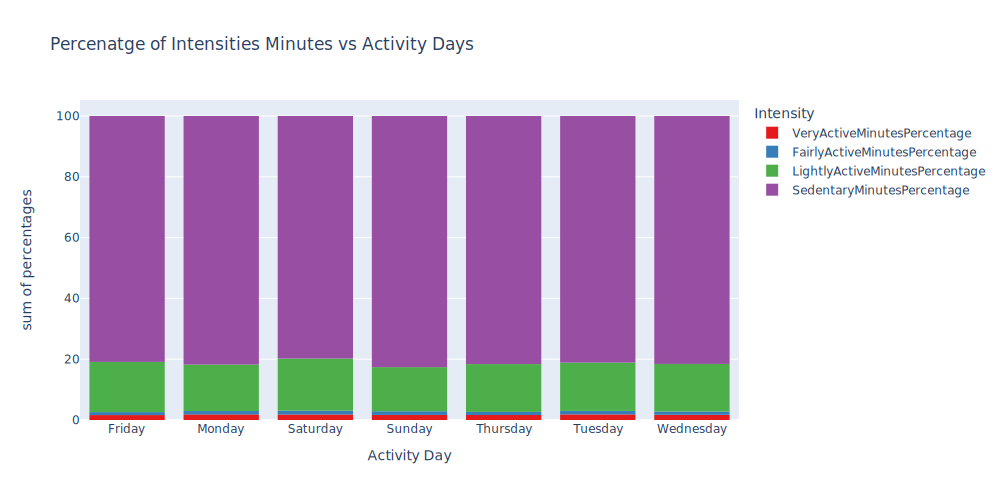

In [106]:
ActivityDay_Intensities = daily_activity.groupby('ActivityDay')['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes','SedentaryMinutes'].sum().reset_index()
ActivityDay_Intensities['TotalIntensityMinutes'] = ActivityDay_Intensities['VeryActiveMinutes'] + ActivityDay_Intensities['FairlyActiveMinutes'] + ActivityDay_Intensities['LightlyActiveMinutes'] + ActivityDay_Intensities['SedentaryMinutes']
ActivityDay_Intensities['VeryActiveMinutesPercentage'] = (ActivityDay_Intensities['VeryActiveMinutes']/ActivityDay_Intensities['TotalIntensityMinutes'])*100
ActivityDay_Intensities['FairlyActiveMinutesPercentage'] = (ActivityDay_Intensities['FairlyActiveMinutes']/ActivityDay_Intensities['TotalIntensityMinutes'])*100
ActivityDay_Intensities['LightlyActiveMinutesPercentage'] = (ActivityDay_Intensities['LightlyActiveMinutes']/ActivityDay_Intensities['TotalIntensityMinutes'])*100
ActivityDay_Intensities['SedentaryMinutesPercentage'] = (ActivityDay_Intensities['SedentaryMinutes']/ActivityDay_Intensities['TotalIntensityMinutes'])*100
ActivityDay_Intensities['TotalIntensityMinutesPercentage'] = ActivityDay_Intensities['VeryActiveMinutesPercentage'] + ActivityDay_Intensities['FairlyActiveMinutesPercentage'] + ActivityDay_Intensities['LightlyActiveMinutesPercentage'] + ActivityDay_Intensities['SedentaryMinutesPercentage']
ActivityDayIntensitiesMelted = ActivityDay_Intensities.melt(id_vars='ActivityDay', value_vars=['VeryActiveMinutesPercentage', 'FairlyActiveMinutesPercentage', 'LightlyActiveMinutesPercentage', 'SedentaryMinutesPercentage'], var_name='Intensity', value_name='percentages')
px.histogram(ActivityDayIntensitiesMelted, x='ActivityDay', y='percentages', color='Intensity', width=1000, title='Percenatge of Intensities Minutes vs Activity Days', labels={'VeryActiveMinutesPercentage':'Very Active Minutes', 'FairlyActiveMinutesPercentage':'Moderately Active Minutes', 'LightlyActiveMinutesPercentage':'Light Active Minutes', 'SedentaryMinutesPercentage':'Sedentary Active Minutes', 'ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1)

>From the plot above, I can see that **the average intensity proportions throughout the week days here are somewhat consistent too, with sedentary minutes taking the biggest portion, followed by lightly active minutes, then very active minutes, and then fairly active minutes taking the last place.**

**Activity Days vs Very Active Minutes:**

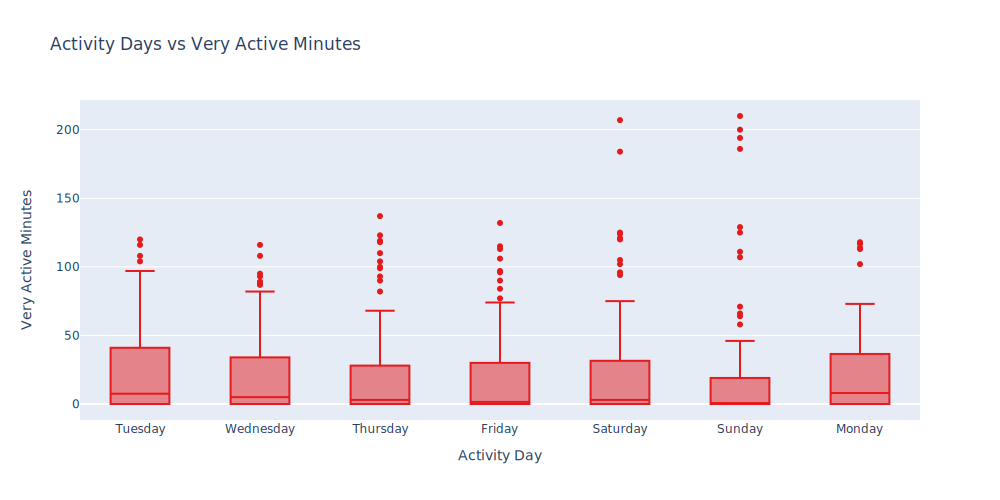

In [107]:
px.box(daily_activity, y='VeryActiveMinutes', x='ActivityDay', width=1000, title='Activity Days vs Very Active Minutes', labels={'VeryActiveMinutes':'Very Active Minutes','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1)

>There doesn't seem to be a particular pattern, except for **a couple of outlier records that were spent on and around the weekends**. Let's explore them more.





In [108]:
daily_activity[['Id', 'ActivityDate', 'ActivityDay', 'TotalSteps','TotalDistance', 'VeryActiveDistance','VeryActiveMinutes', 'VeryActiveSpeed(m/s)', 'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg']][daily_activity['VeryActiveMinutes'] > 150]

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,VeryActiveSpeed(m/s),Calories,TotalMinutesAsleep,TotalTimeInBed,WeightKg
50,1624580081,2016-05-01,Sunday,36019,28.030001,21.92,186,1.96,2690,NaN,NaN,NaN
571,5577150313,2016-04-16,Saturday,14269,10.660000,6.64,184,0.60,4274,406.0,445.0,NaN
572,5577150313,2016-04-17,Sunday,12231,9.140000,5.98,200,0.50,4552,549.0,583.0,90.699997
579,5577150313,2016-04-24,Sunday,15764,11.780000,7.65,210,0.61,4392,543.0,615.0,NaN
585,5577150313,2016-04-30,Saturday,12363,9.240000,5.83,207,0.47,4501,412.0,433.0,NaN
586,5577150313,2016-05-01,Sunday,13368,9.990000,5.31,194,0.46,4546,379.0,398.0,NaN


>I can see that the outliers of **the very active minutes (the much larger minutes values compared to the usual) have been mostly spent on the weekends, which is similar to the patterns of the very active distance outliers.**

**Activity Days vs Very Active Speed:**

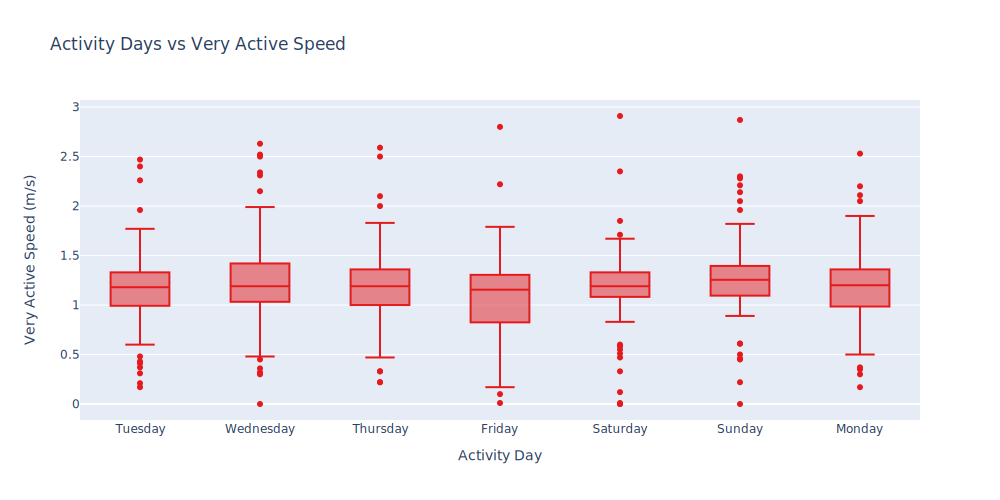

In [109]:
px.box(daily_activity, y='VeryActiveSpeed(m/s)', x='ActivityDay', width=1000, title='Activity Days vs Very Active Speed', labels={'VeryActiveSpeed(m/s)':'Very Active Speed (m/s)','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1)

>I can see that **the average user speed when running very active distances has decreased on Fridays, and increased sparsely on the weekends.** 

**Activity Days vs Moderately Active Distance:**

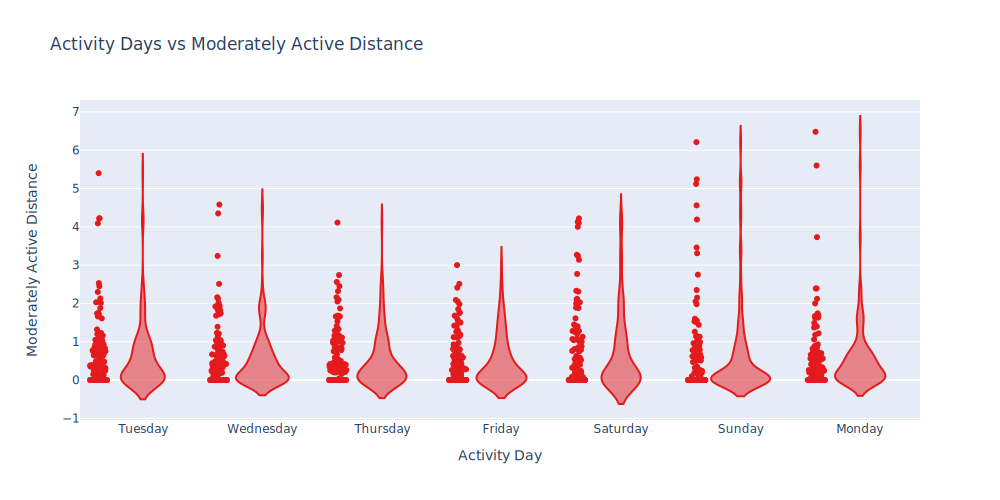

In [110]:
px.violin(daily_activity, y='ModeratelyActiveDistance', x='ActivityDay', width=1000, title='Activity Days vs Moderately Active Distance', points='all', labels={'ModeratelyActiveDistance':'Moderately Active Distance','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1)

>There seems to be a pattern of **less moderately active distances walked on Thursdays and Fridays**. That might be due to them being the last two days before the weekend, so users might be a little exhausted and need to rest.

**Activity Days vs Fairly Active Minutes:**

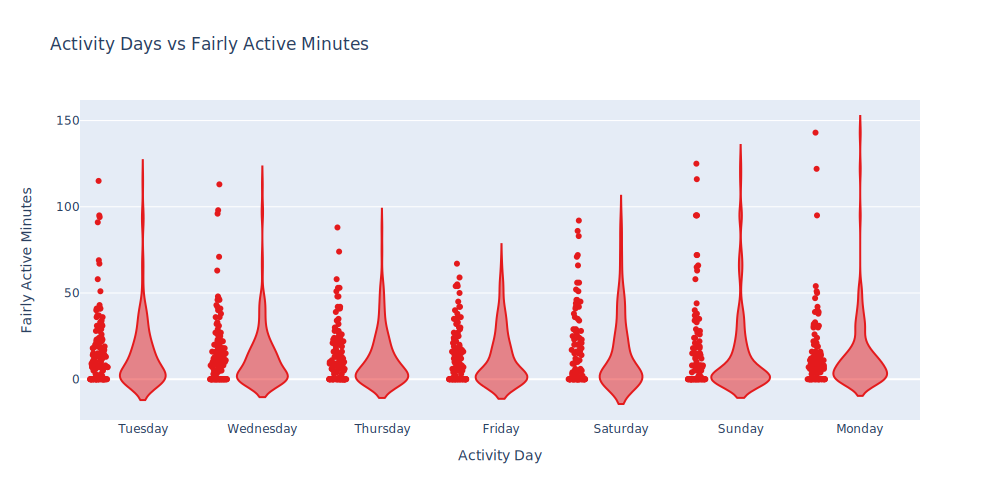

In [111]:
px.violin(daily_activity, y='FairlyActiveMinutes', x='ActivityDay', width=1000, title='Activity Days vs Fairly Active Minutes', points='all', labels={'FairlyActiveMinutes':'Fairly Active Minutes','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1)

>Similar to the pattern in the moderately active distance values, there seems to be a pattern of **less moderately active minutes spent on Thursdays, and Fridays**.

**Activity Days vs Moderately Active Speed:**

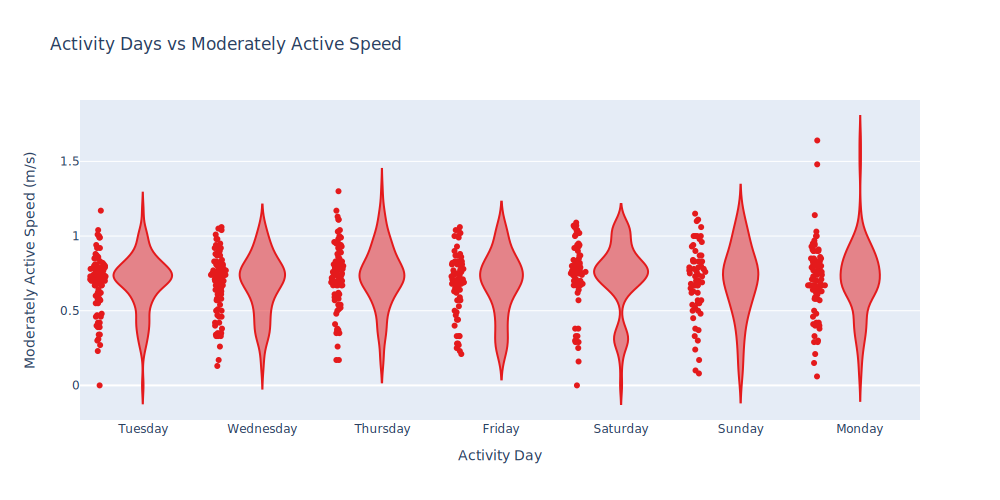

In [112]:
px.violin(daily_activity, y='ModeratelyActiveSpeed(m/s)', x='ActivityDay', width=1000, points='all',title='Activity Days vs Moderately Active Speed', labels={'ModeratelyActiveSpeed(m/s)':'Moderately Active Speed (m/s)','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1)


>There doesn't seem to be an outstanding pattern in the plot above, except for **two very distant outlier values on Mondays**, let's check them out to see if there are any irregularities:

In [113]:
daily_activity[['Id', 'ActivityDay', 'TotalSteps', 'TotalDistance',
       'ModeratelyActiveDistance', 'TotalActivityMinutes', 'FairlyActiveMinutes', 
       'ModeratelyActiveSpeed(m/s)', 'CaloriesLevel', 'SleepLevel', 'TotalTimeInBed', 'BedNoSleep',
       'WeightKg']][daily_activity['ModeratelyActiveSpeed(m/s)'] > 1.4]

,Id,ActivityDay,TotalSteps,TotalDistance,ModeratelyActiveDistance,TotalActivityMinutes,FairlyActiveMinutes,ModeratelyActiveSpeed(m/s),CaloriesLevel,SleepLevel,TotalTimeInBed,BedNoSleep,WeightKg
37,1624580081,Monday,10536,7.41,0.62,1440,7,1.48,1000 calories to 1999 calories,NaN,NaN,NaN,NaN
51,1624580081,Monday,7155,4.93,0.59,1440,6,1.64,1000 calories to 1999 calories,NaN,NaN,NaN,NaN


>**I don't see any irrigularities with those two values**.

**Activity Days vs Calories Level:**

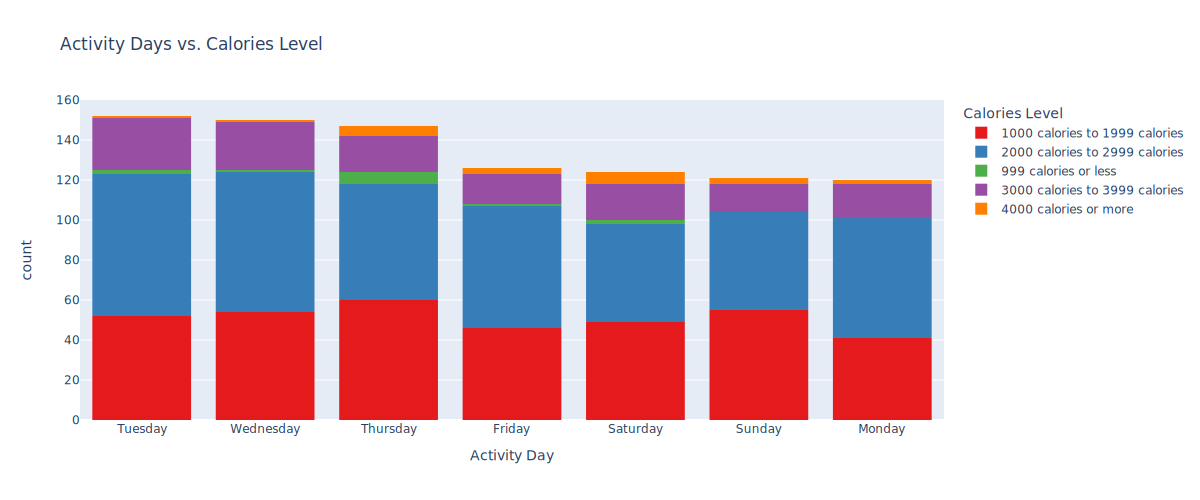

In [114]:
px.histogram(daily_activity[daily_activity['CaloriesLevel'].notna()], x='ActivityDay', color='CaloriesLevel', width=1200, title='Activity Days vs. Calories Level', labels={'CaloriesLevel':'Calories Level','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1).update_xaxes(categoryorder='total descending')

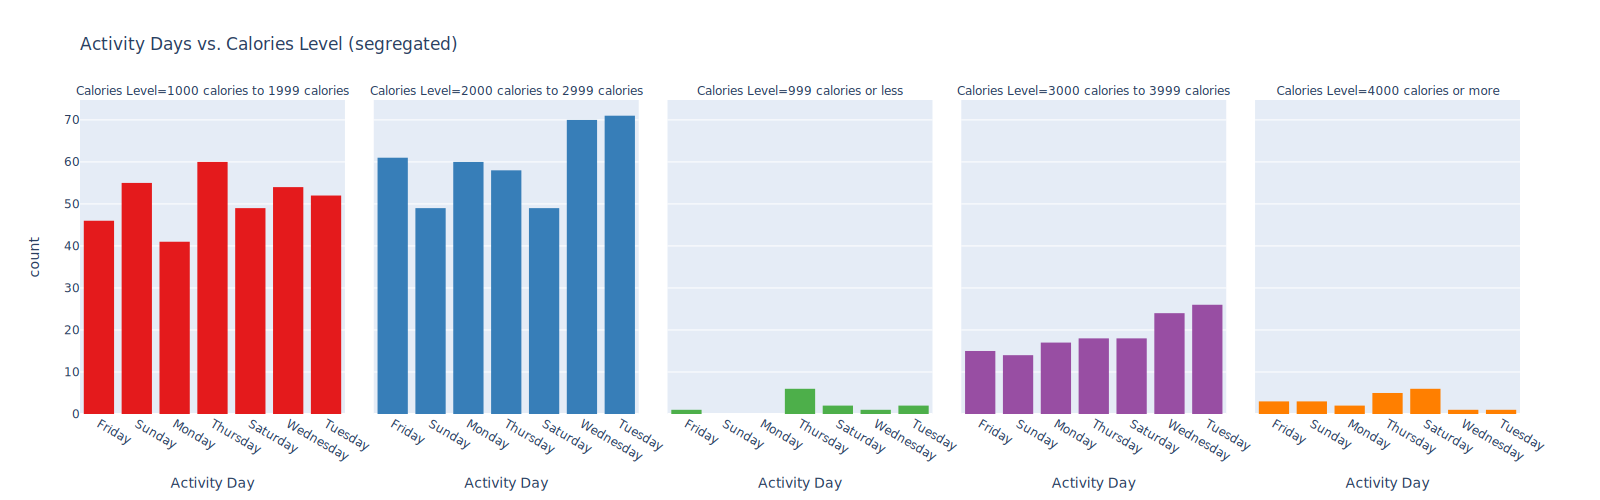

In [115]:
px.histogram(daily_activity[daily_activity['CaloriesLevel'].notna()], x='ActivityDay', color='CaloriesLevel', width=1600, facet_col='CaloriesLevel', title='Activity Days vs. Calories Level (segregated)', labels={'CaloriesLevel':'Calories Level','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1).update_xaxes(categoryorder='total descending').update_layout(showlegend=False)

>Here I notice that **Thursdays have the first spot for 999 calories or less burnt in a day.**

>In the category of **1000 to 1999 calories burnt, I noticed a flucuation every other day.**

>I noticed a **similar flucuation In the category of 2000 to 2999 calories burnt, with an increasing burning rate of calories in Tuesdays and Wednesdays.**

>**Tuesdays and Wednesdays have the leading spots in the category of 3000 to 3999 burnt in a day.**

>I can see that **most of the calories in the category of 4000 or more burnt, while not drastically, are concentrated in Thurdays and Saturdays.**

**Activity Days vs Sleep Level:**

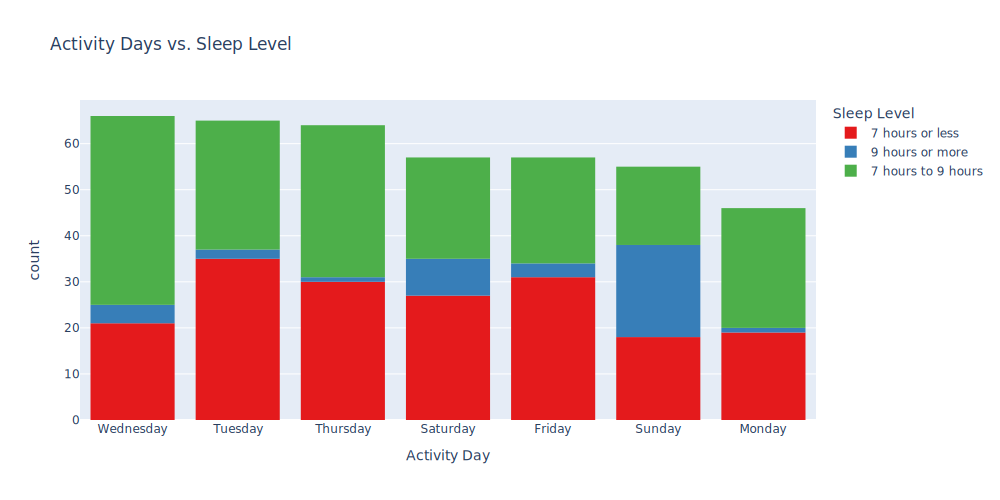

In [116]:
px.histogram(daily_activity[daily_activity['SleepLevel'].notna()], x='ActivityDay', color='SleepLevel', width=1000, title='Activity Days vs. Sleep Level', labels={'SleepLevel':'Sleep Level','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1).update_xaxes(categoryorder='total descending')

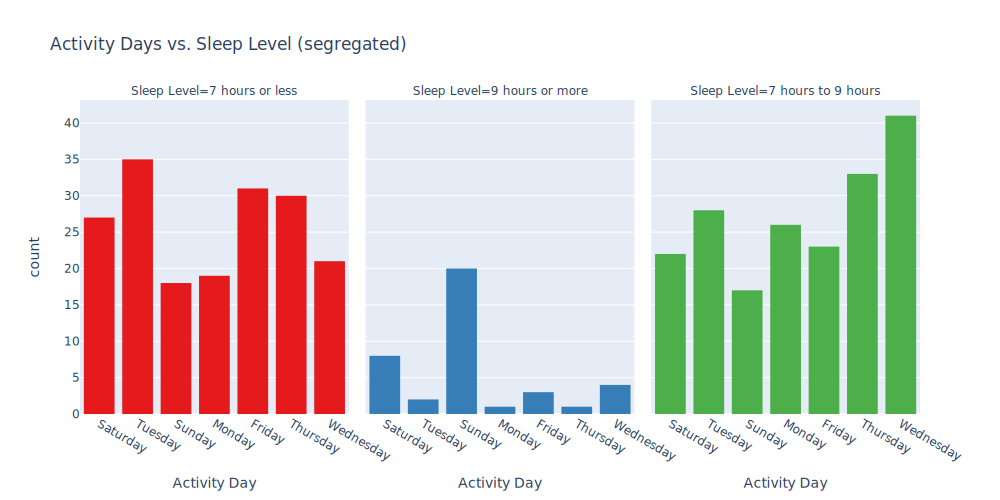

In [117]:
px.histogram(daily_activity[daily_activity['SleepLevel'].notna()], x='ActivityDay', color='SleepLevel', width=1000, facet_col='SleepLevel', title='Activity Days vs. Sleep Level (segregated)', labels={'SleepLevel':'Sleep Level','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1).update_xaxes(categoryorder='total descending').update_layout(showlegend=False)

>It has been noticed that **on Tuesdays, participants tend to sleep the least amount of hours, followed by Fridays and Thursdays.**

>**Wednesdays are more comfortable in the amount of hours slept, and takes the first spot for sleep levels of 7 to 9 hours.**

>Users tend to sleep **more than 9 hours on the weekends, as Sundays take the lead, followed by Saturdays.**

**Activity Days vs Total Minutes Asleep:**

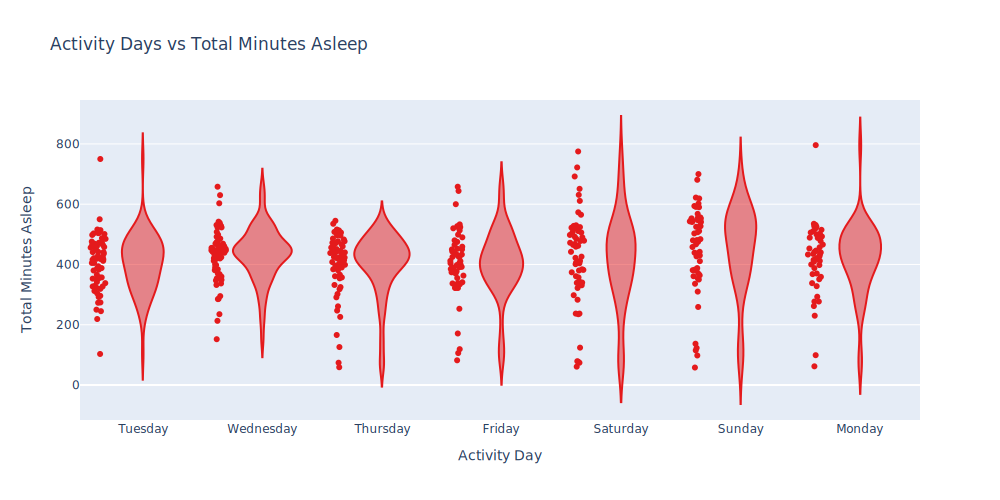

In [118]:
px.violin(daily_activity, y='TotalMinutesAsleep', x='ActivityDay',  width=1000, points='all', title='Activity Days vs Total Minutes Asleep', labels={'TotalMinutesAsleep':'Total Minutes Asleep','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1)

>From the plot above, I can see patterns of **more sleeping periods for some users on weekends (Saturdays and Sundays). In addition to some records where the sleeping periods were less than usual on the same days. On the other hand, some days had less sleeping periods for some users too, such as Thursadays, Fridays, and Mondays.**

**Activity Days vs Total Time In Bed:**

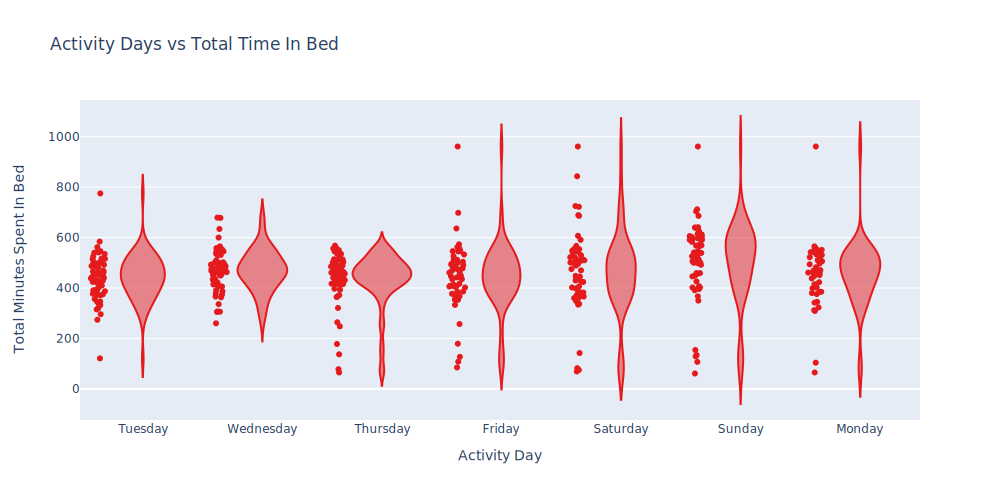

In [119]:
px.violin(daily_activity, y='TotalTimeInBed', x='ActivityDay',  width=1000, points='all', title='Activity Days vs Total Time In Bed', labels={'TotalTimeInBed':'Total Minutes Spent In Bed','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1)

>From the plot above, I can see patterns of **more total time in bed for some users on Firdays, Saturdays, Sundays, and Mondays (on and around the weekends). In addition to some records where the total times in bed were less than usual on the same days. On the other hand, some days had less times in bed for some users too, such as Thursadays.**

**Activity Days vs Minutes Spent in Bed With No Sleep:**

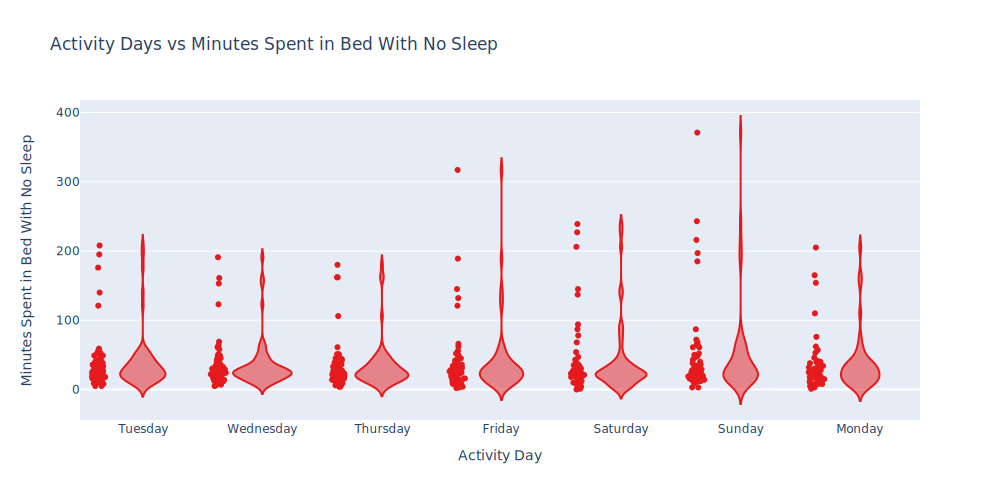

In [120]:
px.violin(daily_activity, y='BedNoSleep', x='ActivityDay',  width=1000, points='all', title='Activity Days vs Minutes Spent in Bed With No Sleep', labels={'BedNoSleep':'Minutes Spent in Bed With No Sleep','ActivityDay':'Activity Day'}, color_discrete_sequence=px.colors.qualitative.Set1)

>There's **no particular pattern in the sleeping behavior of the participants across the week days, except for one very distant outlier on a Friday, and one very distant outlier on a Sunday.**


>I can see a pettern of **more minutes spent in bed with no sleep on the weekends (more [insomnia](https://www.nhs.uk/conditions/insomnia/) in the weekends).**

* **Bivariate Exploration with Total Steps:**

Now I'll create 2 functions to easily generate scatter plots and bar plots from the values I'll explore. I'll name them **'view_scatter'** and **'view_bar'**.

In [121]:
def view_scatter(daily_activity, colx, coly, title, x, x_new, y, y_new):
  g = px.scatter(daily_activity, x=colx, y=coly, width=1000, title=title, labels={x:x_new, y:y_new}, 
                   color_discrete_sequence=px.colors.qualitative.Set1, trendline='ols')
  g.show()

def view_bar(daily_activity, colx, coly, title, x, x_new, y, y_new):
  g = px.bar(daily_activity, x=colx, y=coly, width=1000, title=title, labels={x:x_new, y:y_new}, 
                   color_discrete_sequence=px.colors.qualitative.Set1)
  g.show()

**Total Steps vs Total Distance:**

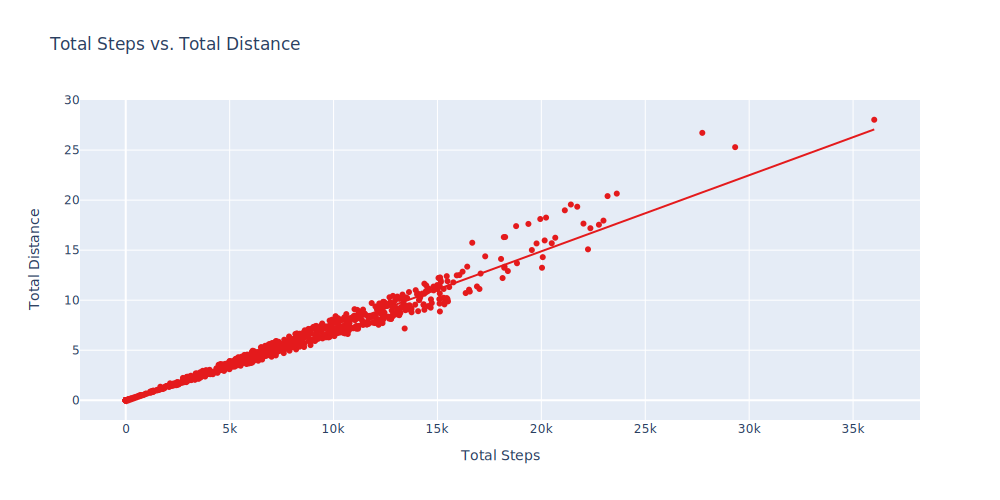

In [122]:
view_scatter(daily_activity, 'TotalSteps', 'TotalDistance', 'Total Steps vs. Total Distance','TotalSteps', 'Total Steps', 'TotalDistance', 'Total Distance')

>Here I can see a **very strong correlation between the total steps and the total distance ([coefficient of determination value](https://en.wikipedia.org/wiki/Coefficient_of_determination) R²=0.97, which makes a model with [good correlation](https://medium.com/m/global-identity?redirectUrl=https%3A%2F%2Ftowardsdatascience.com%2Fan-ode-to-r-squared-804d8d0ed22c))**

**Total Steps vs Steps Level:**

Now I'll show the Steps Level against the against the Total Steps values.

10000 to 14999 records 236 times 
With a percentage of 25.11% 
 

5000 to 9999 records 334 times 
With a percentage of 35.53% 
 

15000 or more records 67 times 
With a percentage of 7.13% 
 

4999 or less records 303 times 
With a percentage of 32.23% 
 

None


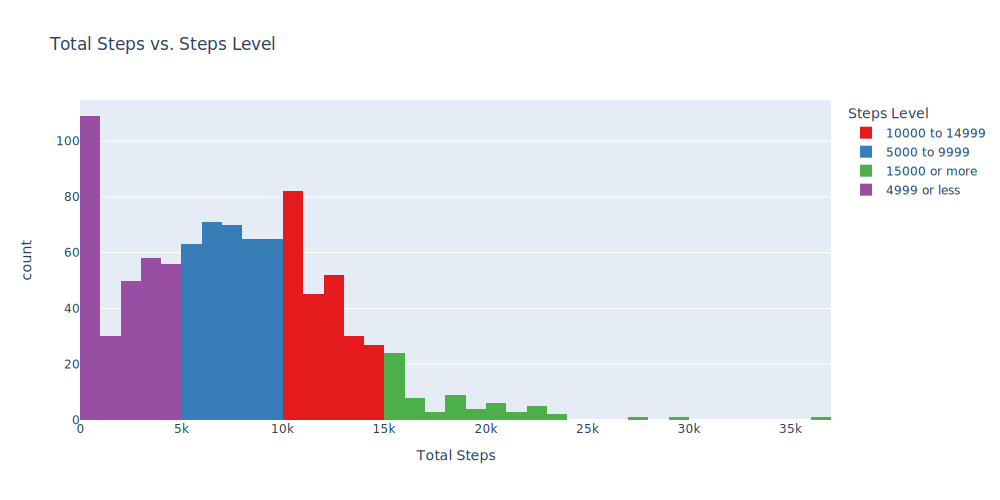

In [123]:
print(view_percentages(daily_activity, 'StepsLevel'))
px.histogram(daily_activity, x='TotalSteps', color='StepsLevel', width=1000, title='Total Steps vs. Steps Level', labels={'TotalSteps':'Total Steps', 'StepsLevel':'Steps Level'}, color_discrete_sequence=px.colors.qualitative.Set1)

>From the plot above, I can see that **most of the steps taken were less that 10K steps, more than half of them fall into the 5000 to 9999 steps category**.

* **Bivariate Exploration with Total Distance:**

**Total Distance vs Distance Level:**

Now I'll show the Distance Level against the Total Distance values.

5 km to 9.9 km records 403 times 
With a percentage of 42.87% 
 

10 km to 14.9 km records 67 times 
With a percentage of 7.13% 
 

4.9 km or less records 445 times 
With a percentage of 47.34% 
 

15 km or more records 25 times 
With a percentage of 2.66% 
 

None


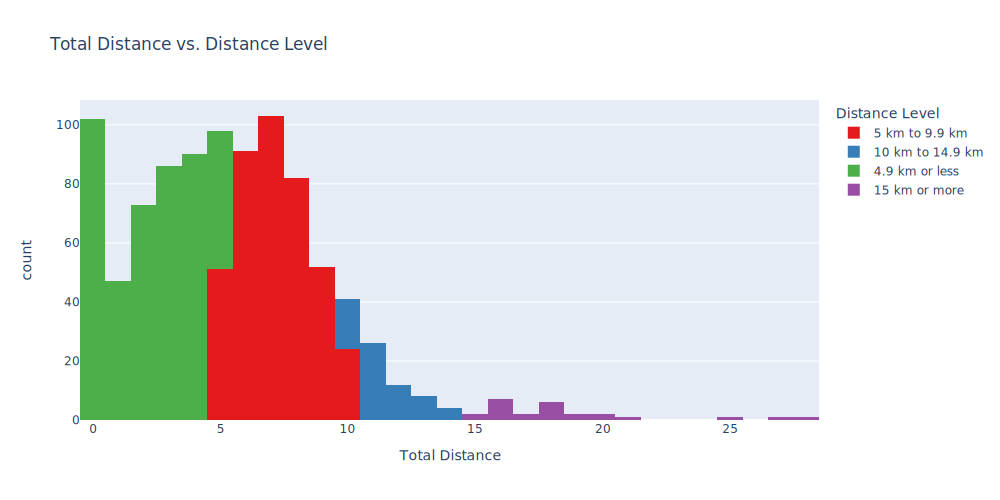

In [124]:
print(view_percentages(daily_activity, 'DistanceLevel'))
px.histogram(daily_activity, x='TotalDistance', color='DistanceLevel', width=1000, title='Total Distance vs. Distance Level', labels={'TotalDistance':'Total Distance', 'DistanceLevel':'Distance Level'}, color_discrete_sequence=px.colors.qualitative.Set1)

>From the plot above, I can see that **most of the distances walked were less that 10 km, more than half of them fall into the less than 5km category**.

**Total Distance vs Sleep Level:**

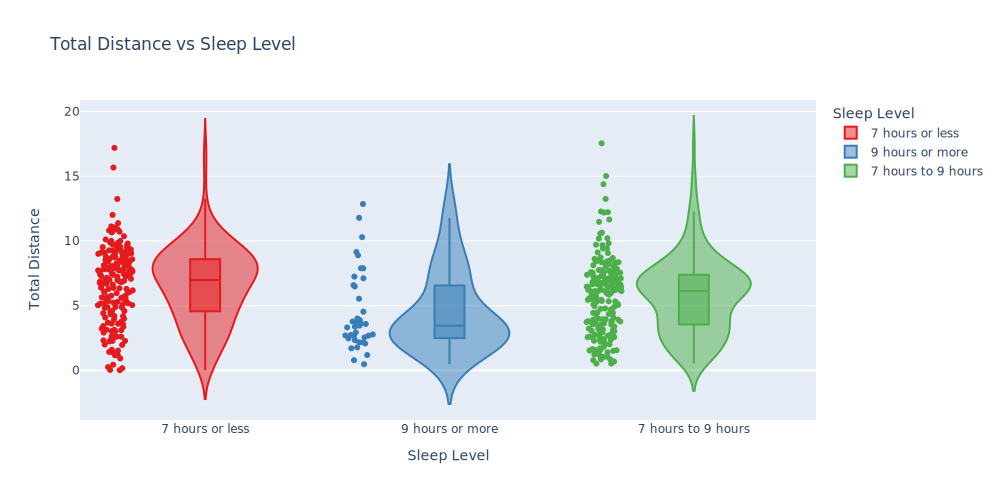

In [125]:
px.violin(daily_activity[daily_activity['SleepLevel'].notna()], x='SleepLevel', y= 'TotalDistance', color='SleepLevel', width=1000, title='Total Distance vs Sleep Level', box=True, points='all' ,labels={'SleepLevel': 'Sleep Level', 'TotalDistance': 'Total Distance'}, color_discrete_sequence=px.colors.qualitative.Set1)

>Here I can see **a negative relationship between Total Distance and Sleep Level, as Sleep Levels (durations of sleep) decrease when the Total Distances increase, this is merely a correlation and doesn't imply causation.**

**Total Distance vs Total Time In Bed:**

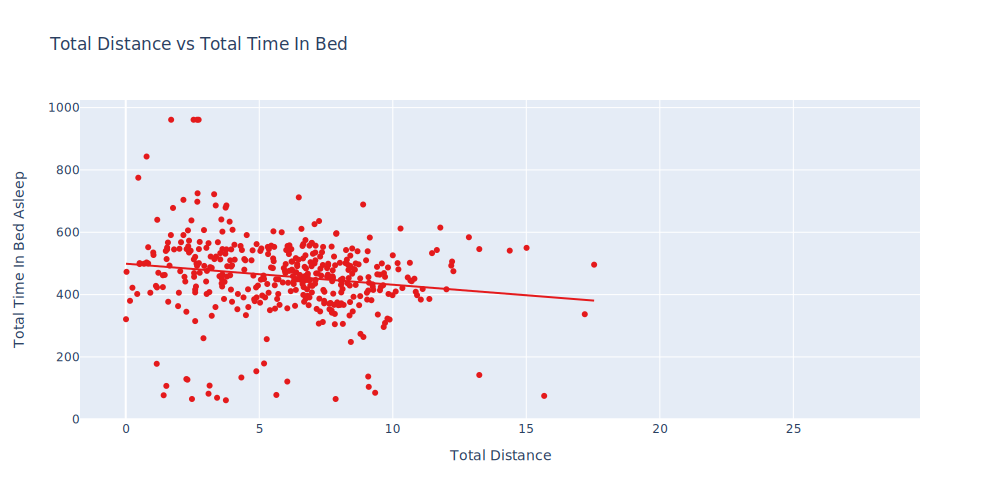

In [126]:
view_scatter(daily_activity, 'TotalDistance', 'TotalTimeInBed', 'Total Distance vs Total Time In Bed','TotalDistance', 'Total Distance', 'TotalTimeInBed', 'Total Time In Bed Asleep')

>This plot feebly confirms its previous one, as **an exceptionally weak negative correlation between Total Distance and Total Time In Bed is apparent, this is merely a correlation and doesn't imply causation (R²=0.026).**

* **Bivariate Exploration with Calories/Calories Level:**

**Calories vs Calories Level:**

Now I'll show the Calories Level against the Total Calories values.

1000 calories to 1999 calories records 357 times 
With a percentage of 37.98% 
 

2000 calories to 2999 calories records 418 times 
With a percentage of 44.47% 
 

999 calories or less records 12 times 
With a percentage of 1.28% 
 

3000 calories to 3999 calories records 132 times 
With a percentage of 14.04% 
 

4000 calories or more records 21 times 
With a percentage of 2.23% 
 

None


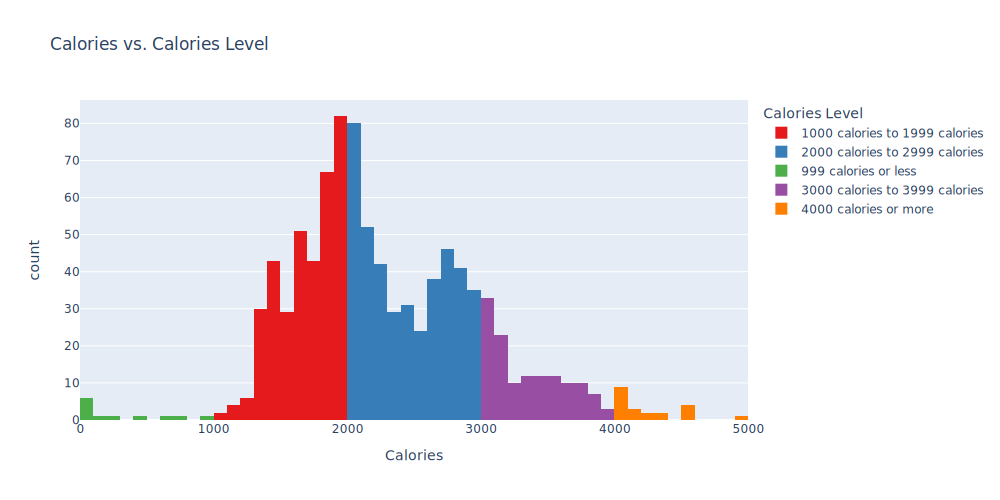

In [127]:
print(view_percentages(daily_activity, 'CaloriesLevel'))
px.histogram(daily_activity, x='Calories', color='CaloriesLevel', width=1000, title='Calories vs. Calories Level', labels={'CaloriesLevel':'Calories Level'}, color_discrete_sequence=px.colors.qualitative.Set1)

>From the plot above, I can see that **most of the burnt calories fall between 1000 calories and 3000 calories, more than half of them fall into the 2000 to 2999 category**.

**Calories Level vs Steps Level:**

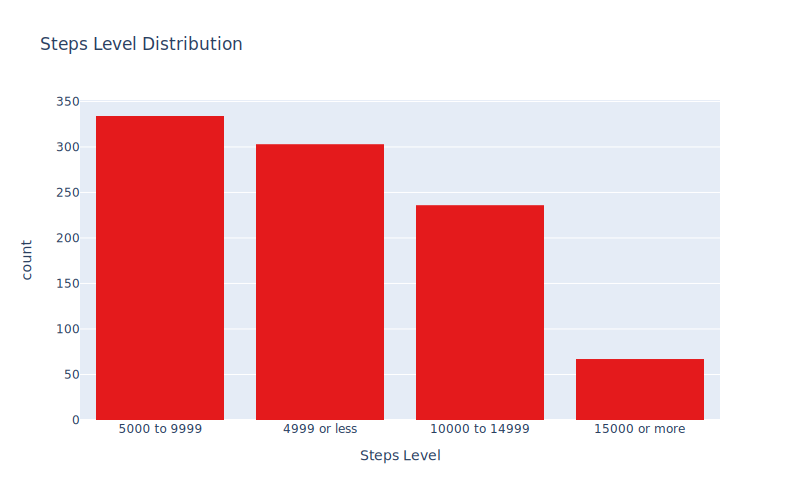

In [128]:
view_distribution(daily_activity, 'StepsLevel', 'Steps Level Distribution','StepsLevel', 'Steps Level')

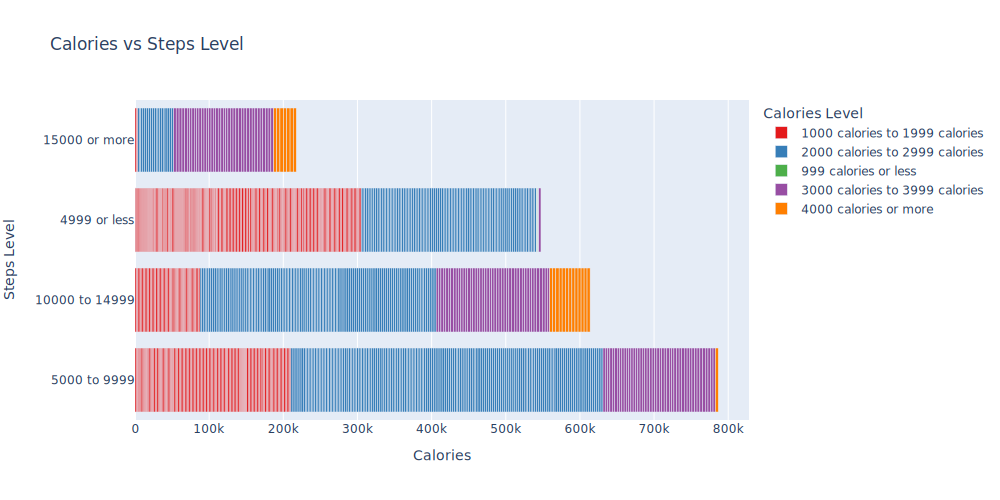

In [129]:
px.bar(daily_activity, x='Calories', y= 'StepsLevel', color='CaloriesLevel', width=1000, title='Calories vs Steps Level', labels={'CaloriesLevel':'Calories Level', 'StepsLevel': 'Steps Level'}, color_discrete_sequence=px.colors.qualitative.Set1).update_yaxes(categoryorder='total descending')

>Comparing the chart **'Calories vs Steps Level'** with the top scoring result from the **'Steps Level Distribution'** in the bar plots above, which was the **5000 to 9999 steps category**, I can see that **most of the calories burnt were in this category too, especialy from the category 2000 to 2999 calories burnt.**

**Calories Level vs Distance Level:**

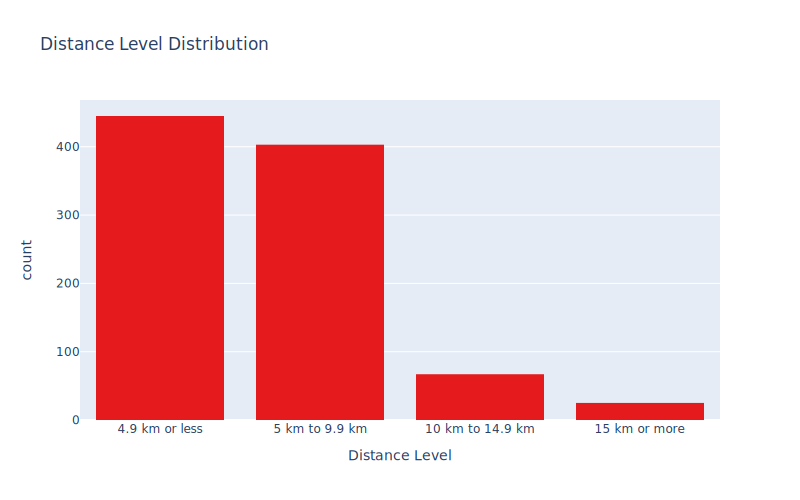

In [130]:
view_distribution(daily_activity, 'DistanceLevel', 'Distance Level Distribution','DistanceLevel', 'Distance Level')

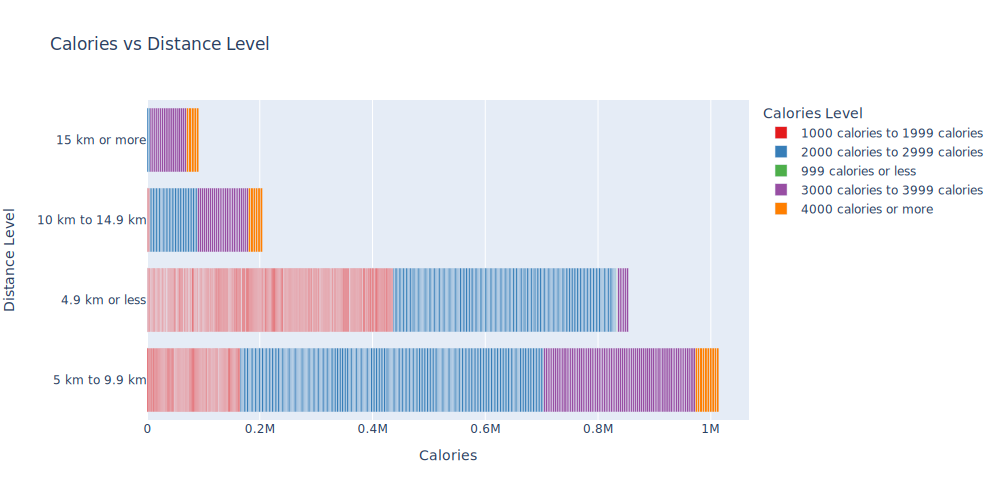

In [131]:
px.bar(daily_activity, x='Calories', y= 'DistanceLevel', color='CaloriesLevel', width=1000, title='Calories vs Distance Level', labels={'CaloriesLevel':'Calories Level', 'DistanceLevel': 'Distance Level'}, color_discrete_sequence=px.colors.qualitative.Set1).update_yaxes(categoryorder='total descending')

>Comparing the chart **'Calories vs Distance Level'** with the top scoring result from the **'Distance Level Distribution'** in the bar plots above, which was the **4.9 km or less category**,  I can see that **most of the calories burnt were in the 5 to 9.9 km, and this makes sense because even though the 4.9 km or less category scores the most counts, their overall summation represent less kilometers that don't burn much calories.**

>I can see a **fairly weak correlation between Calories on one hand, and Very Active Distances and Minutes on the other hand, with a stronger correlation with Very Active Minutes.**

* **Bivariate Exploration with Sleep Columns:**

**Total Minutes Asleep vs Sleep Level:**

Now I'll show the Sleep Level against the Total Minutes Asleep values.

7 hours or less records 181 times 
With a percentage of 44.15% 
 

9 hours or more records 39 times 
With a percentage of 9.51% 
 

7 hours to 9 hours records 190 times 
With a percentage of 46.34% 
 

None


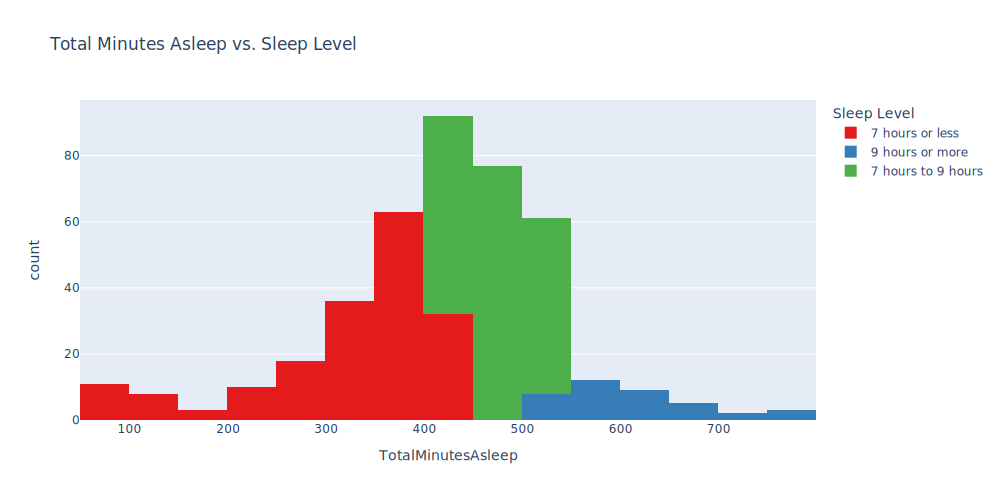

In [132]:
print(view_percentages(daily_activity[daily_activity['TotalMinutesAsleep'].notna()], 'SleepLevel'))
px.histogram(daily_activity[daily_activity['TotalMinutesAsleep'].notna()], x='TotalMinutesAsleep', color='SleepLevel', width=1000, title='Total Minutes Asleep vs. Sleep Level', labels={'SleepLevel':'Sleep Level'}, color_discrete_sequence=px.colors.qualitative.Set1)

>From the plot above, I can see that **sleeping hours were mostly less than 9 hours, more than half of them fall into the 7 to 9 hours asleep category**.

**Sleep Level vs Intensity Speed Values:**

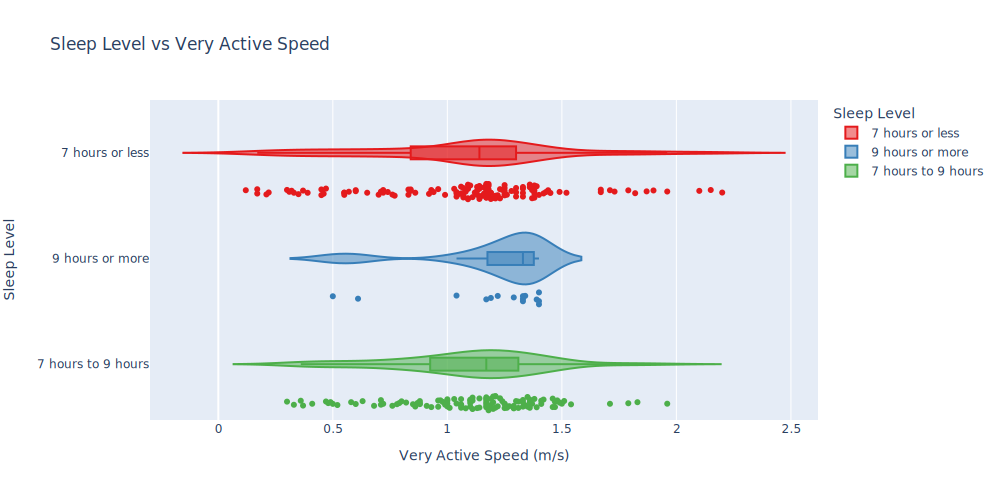

In [133]:
px.violin(daily_activity[daily_activity['SleepLevel'].notna()], x='VeryActiveSpeed(m/s)', y= 'SleepLevel', width=1000, title='Sleep Level vs Very Active Speed', color='SleepLevel', box=True, points='all' ,labels={'SleepLevel': 'Sleep Level', 'VeryActiveSpeed(m/s)': 'Very Active Speed (m/s)'}, color_discrete_sequence=px.colors.qualitative.Set1)

>I can see an **overall pattern of increased speed values when sleep levels are 9 hours of sleep or more (median in 9 hours or more of sleep is 1.33 m/s compared to 1.14 m/s in 7 hours or less, and 1.17 m/s in 7 to 9 hours)**.

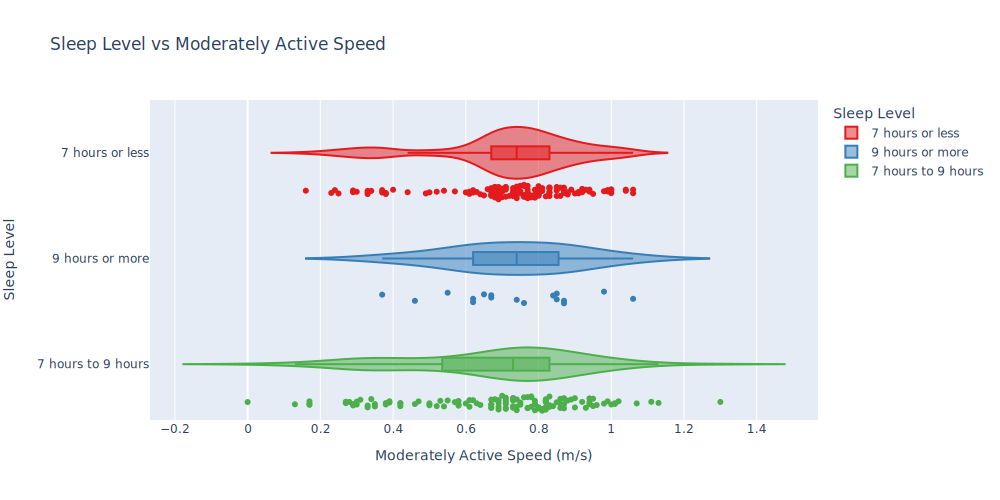

In [134]:
px.violin(daily_activity[daily_activity['SleepLevel'].notna()], x='ModeratelyActiveSpeed(m/s)', y= 'SleepLevel', width=1000, title='Sleep Level vs Moderately Active Speed', color='SleepLevel', box=True, points='all' ,labels={'SleepLevel': 'Sleep Level', 'ModeratelyActiveSpeed(m/s)': 'Moderately Active Speed (m/s)'}, color_discrete_sequence=px.colors.qualitative.Set1)

>There is **no particular pattern to be noticed between the three sleep levels when compared to moderately active speed values in each sleep level.**

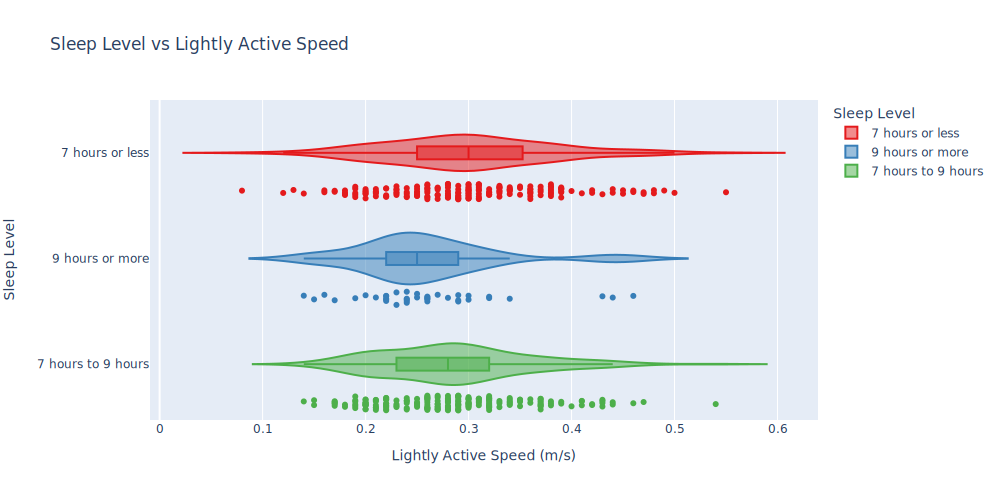

In [135]:
px.violin(daily_activity[daily_activity['SleepLevel'].notna()], x='LightlyActiveSpeed(m/s)', y= 'SleepLevel', width=1000, title='Sleep Level vs Lightly Active Speed', color='SleepLevel', box=True, points='all' ,labels={'SleepLevel': 'Sleep Level', 'LightlyActiveSpeed(m/s)': 'Lightly Active Speed (m/s)'}, color_discrete_sequence=px.colors.qualitative.Set1)

>There seems to be an **overall pattern of increased speed values when sleep levels are 7 hours of sleep or less (median in 7 hours or less of sleep is 0.3 m/s compared to 0.28 m/s in 7 to 9 hours, and 0.25 m/s in 9 hours or more)**.

**Insomnia vs Intensity Speed Values:**

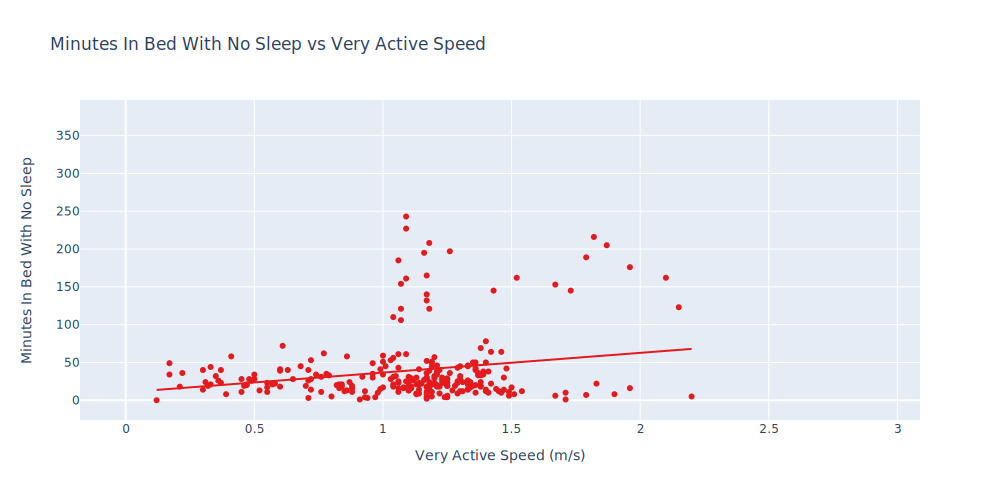

In [136]:
px.scatter(daily_activity, x='VeryActiveSpeed(m/s)', y= 'BedNoSleep', width=1000, title='Minutes In Bed With No Sleep vs Very Active Speed', trendline='ols', labels={'BedNoSleep': 'Minutes In Bed With No Sleep', 'VeryActiveSpeed(m/s)': 'Very Active Speed (m/s)'}, color_discrete_sequence=px.colors.qualitative.Set1)

>I can see that there's a **very weak correlation between increasing very active speed values and the number of minutes spent in bed with no sleep (R²=0.047), I don't think there's a definite causation between these two variables, but maybe If these very active running speed values have [happened close to bedtime, they might induce insomnia](https://www.sleepfoundation.org/insomnia/exercise-and-insomnia#:~:text=Can%20Exercise%20Cause%20Insomnia%3F,keep%20them%20up%20at%20night.)**.

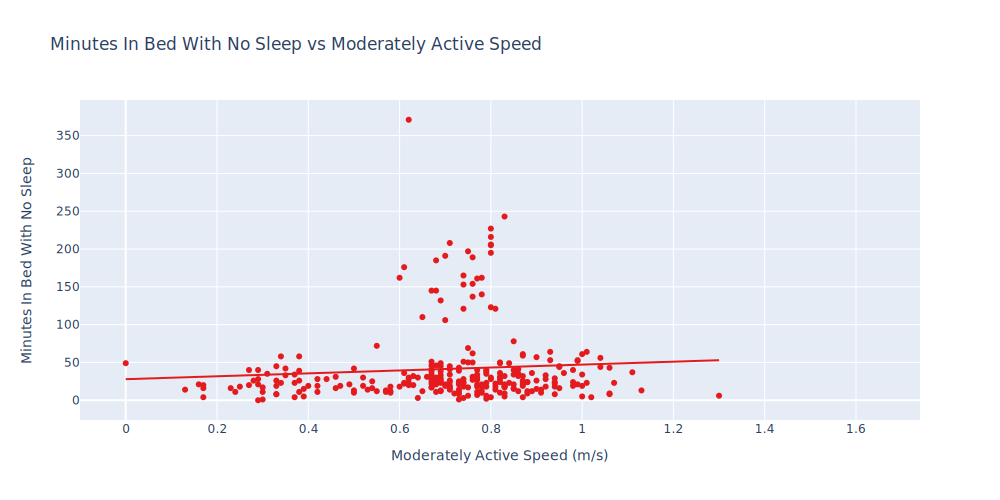

In [137]:
px.scatter(daily_activity, x='ModeratelyActiveSpeed(m/s)', y= 'BedNoSleep', width=1000, title='Minutes In Bed With No Sleep vs Moderately Active Speed', trendline='ols', labels={'BedNoSleep': 'Minutes In Bed With No Sleep', 'ModeratelyActiveSpeed(m/s)': 'Moderately Active Speed (m/s)'}, color_discrete_sequence=px.colors.qualitative.Set1)

>I can see that there's also a **very weak correlation between increasing moderately active speed values and the number of minutes spent in bed with no sleep (R²=0.006). Compared to very active speeds, they have a weaker correlation, making very active speeds a bigger contributor to users' insomnia.**

**Sleep Level vs Calories:**

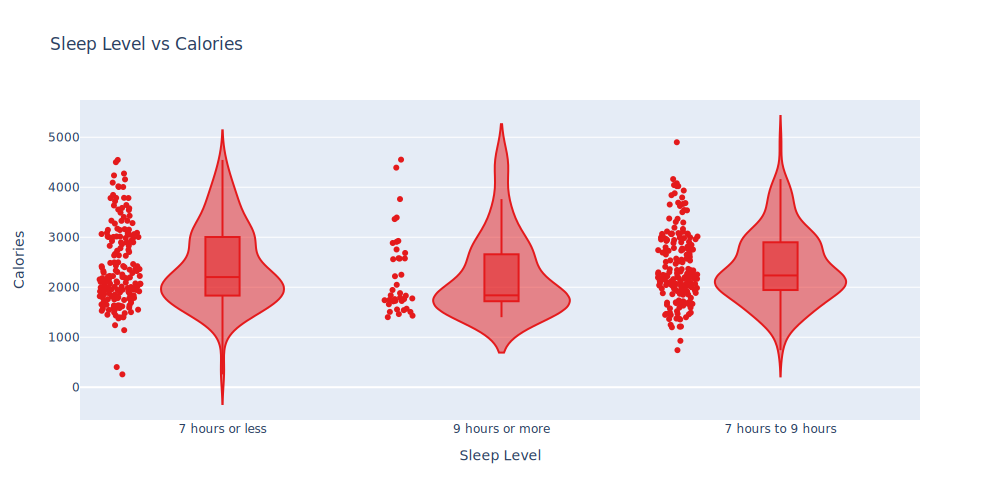

In [138]:
px.violin(daily_activity[daily_activity['SleepLevel'].notna()], x='SleepLevel', y= 'Calories', width=1000, title='Sleep Level vs Calories',box=True, points='all' ,labels={'SleepLevel': 'Sleep Level'}, color_discrete_sequence=px.colors.qualitative.Set1)

>Here I can see that **mostly when calories burnt in a day are above the 2000 calories mark, users tend to sleep less than 9 hours, whereas when the calories burnt in a day decreases, especialy under 2000 calories, users tend to sleep more than 9 hours.** 

**Total Minutes Asleep vs Total Time In Bed:**

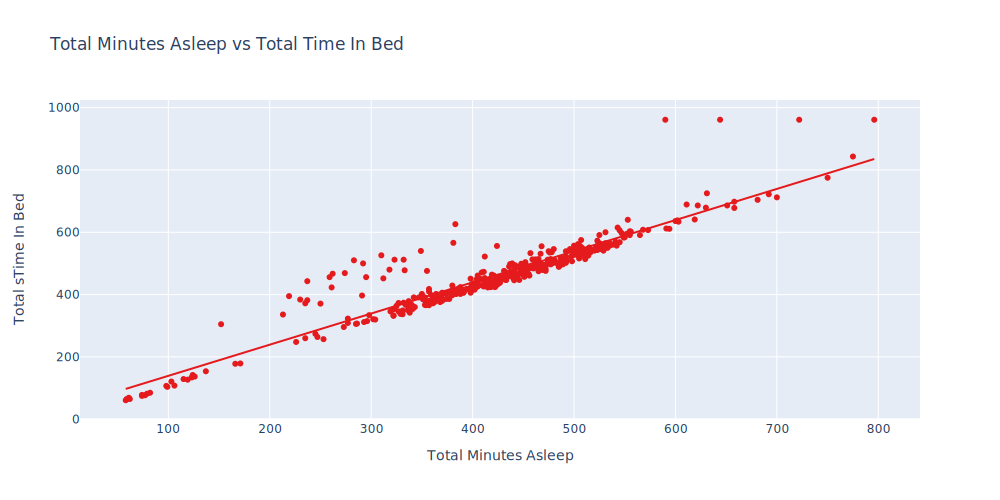

In [139]:
view_scatter(daily_activity, 'TotalMinutesAsleep', 'TotalTimeInBed', 'Total Minutes Asleep vs Total Time In Bed','TotalMinutesAsleep', 'Total Minutes Asleep', 'TotalTimeInBed', 'Total sTime In Bed')

>Thers is a clear **strong correlation between the Total Minutes Asleep and the Total Time In Bed (R²=0.87), with some outliers when time in bed is a bit more than total minutes asleep**.

### **4.3. Multivariate Exploration Data Analysis**

* **Total Distance vs Total Steps vs Calories:**

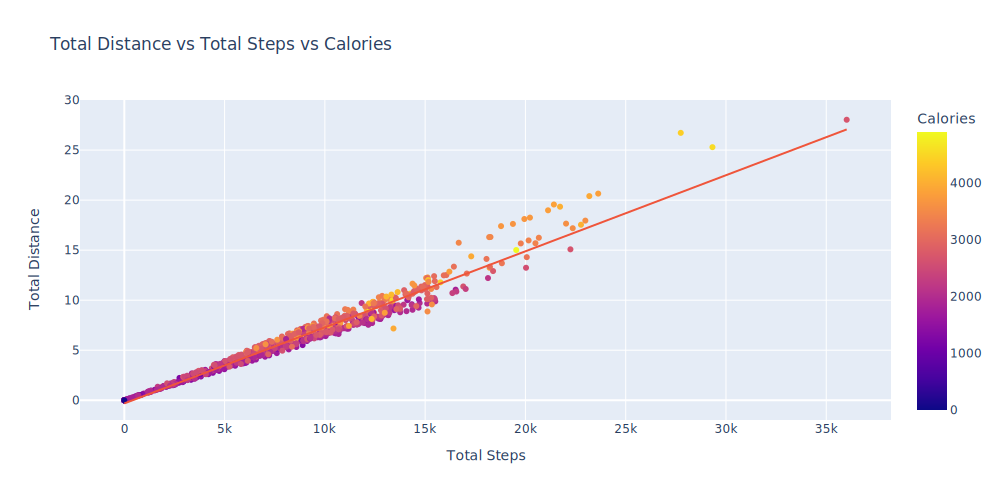

In [140]:
px.scatter(daily_activity, x='TotalSteps', y='TotalDistance', color='Calories', trendline='ols', width=1000, title='Total Distance vs Total Steps vs Calories', labels={'TotalDistance': 'Total Distance', 'TotalSteps':'Total Steps'}, color_discrete_sequence=px.colors.qualitative.Set1)


>I see a **very strong correlation between the three variables of Total Steps, Total Distance, and Calories burnt.**

* **Total Minutes Asleep vs Total Time In Bed vs Total Time In Bed With No Sleep:**

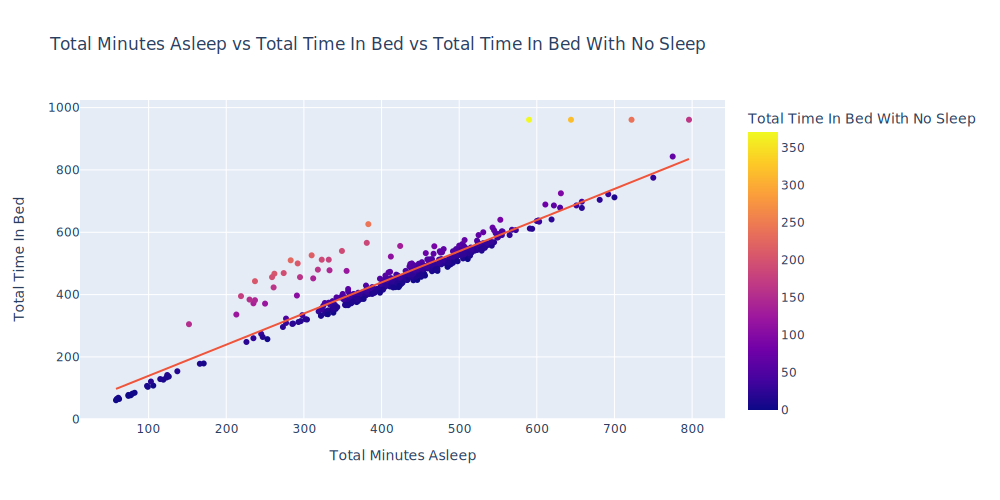

In [141]:
px.scatter(daily_activity, x='TotalMinutesAsleep', y='TotalTimeInBed', color='BedNoSleep', trendline='ols', width=1000, title='Total Minutes Asleep vs Total Time In Bed vs Total Time In Bed With No Sleep', labels={'TotalMinutesAsleep': 'Total Minutes Asleep', 'TotalTimeInBed':'Total Time In Bed', 'BedNoSleep':'Total Time In Bed With No Sleep'}, color_discrete_sequence=px.colors.qualitative.Set1)


>I see a **very strong correlation between the three variables of Total Minutes Asleep, Total Time In Bed, with clear color indications that whenever total time in bed is further away from the trendline, total time in bed values get higher and higher (going more yellow).**

* **Activity Day vs User Weight:**

count     67.000000
mean      72.035821
std       13.923206
min       52.599998
25%       61.400002
50%       62.500000
75%       85.049999
max      133.500000
Name: WeightKg, dtype: float64


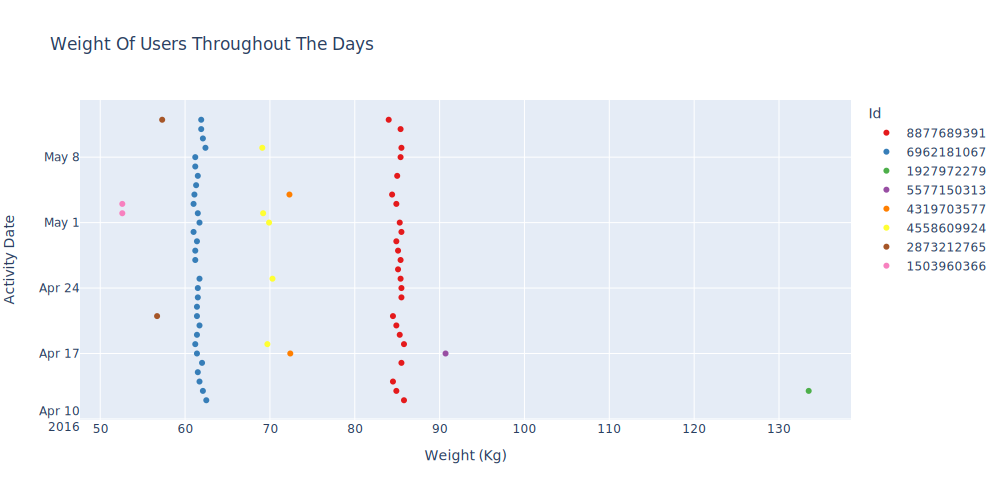

In [142]:
print(daily_activity['WeightKg'].describe())
px.scatter(daily_activity[daily_activity['WeightKg'].notna()].sort_values(by='ActivityDate'), x='WeightKg', y='ActivityDate', color='Id', width=1000, title='Weight Of Users Throughout The Days', labels={'WeightKg': 'Weight (Kg)', 'ActivityDate': 'Activity Date'}, color_discrete_sequence=px.colors.qualitative.Set1)

>The plot signals that **users' registered weight values only slighly change throughout the registered month. Users such as 8877689391 (red color) whose weight goes from 85.5 kgs to 84 kgs, fluctuating periodically between these two values, and user 6962181067 (blue color) whose weight flacuates between 61 kgs and 62.5 kgs, and who registers 61.9 kgs at the end of this cycle.**

>**Overall, the interval is very short to see a great variation in weights, in addition to the fact that most users don't even register their weights periodicaly.**

## **5. Share Phase:**

* ### **5.1. Questions Answered (Key Takeaways)**


* Most of the steps taken were less than 10K steps, more than half of them from 5000 to 9999 steps.

* Most of the distances walked were less than 10 km, more than half of them less than 5 km.

* Most of the burnt calories fall between 1000 calories and 3000 calories, and more than half of them fall into 2000 to 2999 calories burnt.

* Most of the distances taken daily were from Light Active Distances (61.7%), followed by Very Active Distances (27.8%), then Moderately Active Distances (10.5%).

* Most of the minutes spent daily were Sedentary Minutes (81.3%), followed by Light Active Minutes (15.8%), then Very Active Minutes (1.74%), and Moderately Active Minutes took the last place (1.11%).

* Tuesday, Wednesday, and Thursday seem to be the preferable days for users when they want to walk less than 15 km a day

* Weekends and midweeks (particularly Saturdays) are preferable to users when they want to walk more than 15 km a day.

* The average user speed when running very active distances decreases on Fridays, and increases sparsely on the weekends.

* The average user speed when running lightly active distances has been mostly consistent, with only some instances where the speed decreased sparsely on the weekends.

* There is a pattern of less moderately active distances walked on Thursdays and Fridays. That might be due to them being the last two days before the weekend, so users might be a little exhausted and need to rest.

* Tuesdays and Wednesdays have the leading spots in the category of 3000 to 3999 burnt in a day.

* Most of the burnt calories fall between 1000 calories and 3000 calories, and more than half of them fall into the 2000 to 2999 category.

* Most of the calories in the category of 4000 or more burnt, while not drastically, are concentrated on Thursdays and Saturdays.

* Sleeping hours were mostly less than 9 hours, more than half of them fall into 7 to 9 hours of sleep.

* Users tend to stay in bed before getting to sleep mostly for less than 70 minutes, with a mean of 39.3 minutes.

* Users tend to sleep the least amount of hours on Tuesdays, followed by Fridays and Thursdays.

* Wednesdays are more comfortable in the number of hours slept and take the first spot for sleep levels of 7 to 9 hours.

* Users tend to sleep more than 9 hours on the weekends, as Sundays take the lead, followed by Saturdays.

* I can see a pattern of more minutes spent in bed with no sleep on the weekends (more insomnia on the weekends).

* Here I can see a negative relationship between Total Distance and Sleep Level, as Sleep Levels (durations of sleep) decrease when the Total Distances increase, this is merely a correlation and doesn't imply causation.

* I can see an overall pattern of increased very active speed values when sleep levels are 9 hours of sleep or more (median in 9 hours or more of sleep is 1.33 m/s compared to 1.14 m/s in 7 hours or less, and 1.17 m/s in 7 to 9 hours).

* There seems to be an overall pattern of increased lightly active speed values when sleep levels are 7 hours of sleep or less (median in 7 hours or less of sleep is 0.3 m/s compared to 0.28 m/s in 7 to 9 hours, and 0.25 m/s in 9 hours or more).

* Mostly when calories burnt in a day are above the 2000 calories mark, users tend to sleep less than 9 hours, whereas when the calories burnt in a day decreases, especially under 2000 calories, users tend to sleep more than 9 hours

* I can see that there's a very weak correlation between increasing very active speed values and the number of minutes spent in bed with no sleep (R-Squared=0.047), I don't think there's a definite causation between these two variables, but maybe If these very active running speed values have happened close to bedtime, they might induce insomnia.

* The interval is very short to see a great variation in weights, in addition to the fact that most users don't even register their weights periodically (only 8 users were tracking their weight progress, and not even periodically).

## **6. Act Phase:**

* ### **6.1.  Final Conclusions and Recommendations**

* Users could receive a weekly report of daily total walked distances, and a percentage of the variation between the averages from every week to its previous.

* Users could receive a weekly report of daily total burnt calories against the goal set by the user in some form of a progress bar or a percentage, and a percentage of the variation between the averages from every week to its previous.

* Users could receive a weekly report of daily average speed values, and a percentage of the variation between the averages from every week to the previous.

* Bellabeat could notify the users with encouraging phrases while running as they reach the average speeds for each intensity to encourage them to achieve more.

* Bellabeat app could run a song playlist (when enabled by the user) while doing a running activity that has a rhythm similar to the pacing and the speed of the user to direct the brain into staying on the same activity as much as possible.

* As sedentary minutes make up 81.3% of the user's total daily minutes, Bellabeat can send a regular notification to the user when in sedentary mode informing them when they've been setting down for too long and encouraging them to take a walk.

* As light active distances make up 61.7% of the user's activity distances, Bellabeat can send a regular notification encouraging them to decrease this percentage comparing it to the average users’ percentage.

* Users could receive a daily notification with the details of last night's sleep (total sleep time, total time with no sleep, etc...), with a percentage of how it differs from the previous night's sleep.

* As users prefer to walk on Tuesdays, Wednesdays, and Saturdays, Bellabeat could send regular daily notifications urging users to achieve goals similar to that achieved on these days to keep a good streak.

* Bellabeat could introduce competitions between different users with similar body features, which would highly encourage lots of users to do more in order to beat those who are similar to them.

* Bellabeat could send out regular notifications that compare users' achievements to achievements of users with similar body features, encouraging them to beat those who are similar to them.

* Bellabeat could use the sensors of the devices to introduce flights climbed and even add it to the list of exercises on the device.

* Users to receive automated notifications to urge them to sleep at specific hours in order to attain the optimally required goals.

* Users are to receive warnings when running very fast close to bedtime stating that it might induce insomnia and less sleeping quality.

* As most users have not tracked their weight progress, Bellabeat could promote persistent weight-tracking features to users to hook them and even get new users. 


* ### **6.2.  Recommendations Presentation**

You can find the presentation file attached in this repository, with the name 'Bellabeat Case study Presentation'.